# **Checkpoint 1**

## **a) Exploración Inicial**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

A continuación, comenzaremos con la exploración inicial de las variables incluídas en el siguiente dataframe:

In [2]:
df_default = pd.read_csv('https://raw.githubusercontent.com/AlanBotoshansky/7506R-1C2023-GRUPO14/main/TP1/Datasets/hotels_train.csv')
df = df_default.copy()
df

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       agent company days_in_waiting_list    customer_type     adr  \
0        9.0     NaN                    0        Transient  115.50   
1        NaN     NaN                    0        Transient   42.00   
2        9.0     NaN                    0        Transient  229.00   
3      154.0     NaN                    0        Transient   75.00   
4       20.0     NaN                    0  Transient-Party   75.00   
...      ...     ...                  ...              ...     ...   
61908  240.0     NaN                    0        Transient   48.00   
61909    NaN     NaN                    0        Transient  149.00   
61910    NaN   153.0                    0        Transient   95.00   
61911   96.0     NaN                    0        Transient   36.05   
61912    9.0     NaN                    0        Transient  143.29   

       required_car_parking_spaces  total_of_special_requests  \
0                                0                          1   
1                                1                          0   
2                                0                          2   
3                                0                          0   
4                                0                          1   
...                            ...                        ...   
61908                            0                          1   
61909                            0                          0   
61910                        

Eliminaremos la variable "reservation_status_date" ya que la variable "reservation_status" fue removida previamente, por lo que ésta ya no tiene sentido.

In [3]:
df = df.drop('reservation_status_date', axis=1)

### **Tipos de variable**

In [4]:
df.shape

(61913, 31)

En principio, hay 31 variables a tener en cuenta. Estas se dividen en dos tipos principales: variables cuantitativas y cualitativas.
*   Variables Cuantitativas: son aquellas que se pueden medir numéricamente (por ejemplo: cantidad de días en lista de espera, cantidad de adultos y niños, cantidad de cancelaciones previas, entre otras). 
*   Variables Cualitativas: son aquellas que describen características o atributos, es decir, que no se pueden medir numéricamente (por ejemplo: tipo de depósito, tipo de habitación asignada, mes de la fecha de llegada, país, entre otras). 



In [5]:
cols_to_replace = ['is_repeated_guest', 'is_canceled']
df[cols_to_replace] = df[cols_to_replace].replace({1: 'Yes', 0: 'No'})

Observando las distintintas variables, podemos ver que las variables "is_repeated_guest" y "is_canceled" toman como valor "0" o "1" dependiendo si se trata de un caso negativo o positivo, respectivamente. Por lo tanto, al tratarse de variables cualitativas, decidimos cambiar los valores "0" y "1" por "No" y "Yes", respectivamente. De esta forma, queda más clara la clasificación de las variables. 

In [6]:
df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Ahora, al hacer "dtypes" podemos ver la clasificación de cada columna; en principio, *object* para las cualitativas e *int64* o *float64* (tipos numéricos) para las cuantitativas.
Sin embargo, hay variables que aún toman valores numéricos e igualmente son cualitativas: "agent" (es el id de la agencia de viajes que llevó a cabo la reserva), "company" (es el id de la compañía o entidad que hizo la reserva o fue la responsable del pago).

Además, el hecho de que las variables "children", "agent" y "company" estén clasificadas como de tipo *float* se debe a que hay datos faltantes en las columnas de cada una y por eso la biblioteca Pandas les asigna dicho tipo de variable. Esto lo veremos más adelante en el apartado **c) Datos Faltantes**.

### **Variables Cuantitativas**

Ahora, calculamos las medidas de resumen de cada variable cuantitativa.

In [7]:
df.loc[:,~df.columns.isin(['agent', 'company'])].describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  61913.000000       61913.000000               61913.00000   
mean     112.248187        2016.154749                  27.21808   
std      110.717953           0.708389                  13.52601   
min        0.000000        2015.000000                   1.00000   
25%       23.000000        2016.000000                  16.00000   
50%       78.000000        2016.000000                  28.00000   
75%      172.000000        2017.000000                  38.00000   
max      629.000000        2017.000000                  53.00000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               61913.000000             61913.000000   
mean                   15.785812                 0.924135   
std                     8.795489                 0.993101   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                16.000000   

       stays_in_week_nights        adults      children        babies  \
count          61913.000000  61913.000000  61909.000000  61913.000000   
mean               2.510054      1.862791      0.104896      0.007155   
std                1.884926      0.589066      0.402847      0.092158   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               40.000000     55.000000     10.000000      9.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count            61913.000000                    61913.000000   
mean                 0.114790                        0.115420   
std                  0.993723                        1.396359   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       70.000000   

       booking_changes  days_in_waiting_list           adr  \
count     61913.000000          61913.000000  61913.000000   
mean          0.195952              2.638977    102.383773   
std           0.610519             18.619092     47.757640   
min           0.000000              0.000000     -6.380000   
25%           0.000000              0.000000     70.000000   
50%           0.000000              0.000000     95.000000   
75%           0.000000              0.000000    126.000000   
max          17.000000            391.000000    510.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 61913.000000               61913.000000  
mean                      0.049957                   0.523703  
std                       0.221023                   0.775412  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

Siendo:

*   count: el número de valores no nulos en la columna.
*   mean: la media/promedio de los valores en la columna.
*   std: la desviación estándar de los valores en la columna, es decir, la dispersión o variabilidad del conjunto de datos con respecto a su media.
*   min: el valor mínimo en la columna.
*   25%: el percentil 25 (cuartil 1) de los valores en la columna.
*   50%: el percentil 50 (cuartil 2 o mediana) de los valores en la columna.
*   75%: el percentil 75 (cuartil 3) de los valores en la columna.
*   max: el valor máximo en la columna.




### **Variables Cualitativas**

A continuación se hara hincapie en las variables cualitativas con las que se cuentan, siendo estas un total de 15:

*   **hotel**: solo se cuenta con dos valores, *City Hotel* y *Resort Hotel*, representando el primero el 68% del total.
*   **arrival_date_month**: representada por los meses, de los cuales el mas frecuente es *August* y el menos frecuente *January*, encontrandose la frecuencia de todos en un rango aproximado de entre 7000 y 3000.
*   **meal**: posee 5 valores. *BB* representa un 77% del total, *HB* un 12%, *SC* un 9%, *FB* un 1% y *Undefined* otro 1%.
*   **country**: existen 149 valores distintos, siendo Portugal (*PRT*) un 45% del total, seguido de Gran Bretaña (*GBR*) que representa el 9%. 21 países solo poseen una unica aparición. Vale destacar que cuenta con una pequeña cantidad de datos faltantes. He aqui una vista de los primeros 10 países:



In [8]:
pd.DataFrame(df['country'].value_counts()).head(10)

country
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021



*   **market_segment**: está compuesto por 8 valores distintos, *Online TA* aparece aproximadamente 29200 veces, seguido de *Offline TA/TO* con 12300 apariciones y luego *Groups* con 11500. El resto lo componen *Direct* (5700 aprox.), *Corporate* (2400 aprox.), *Complementary* (359), *Aviaton* (110) y *Undefined* (2).
*   **distribution_channel**: hay 5 valores, siendo el mayoritario por mucha diferencia *TA/TO*, siendo el 83% del total. Los siguientes son *Direct* con el 11% y *Corporate* con el 5%, por último *GDS* y *Undefined* poseen valores muy ínfimos para el total, no representando ninguno mas del 0,1%.
*   **reserved_room_type**/**assigned_room_type**: ambas variables cualitativas son representadas por diferentes letras, cuya frecuencia se muestra a continuación:



In [9]:
df['reserved_room_type'].value_counts()

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

In [10]:
df['assigned_room_type'].value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

*   **agent**/**company**: como se mencionó anteriormente, son variables cualitativas representadas por valores númericos, existiendo 296 valores diferentes para agent y 276 para company. El id más frecuente de la primer variable es *9*, representando un 32% de su total, en cuanto a la segunda variable, el que cuenta con más presencias es *40*, con una representación del 12%. Como ya se aclaró, ambas presentan datos faltantes, principalmente **company**, que no cuenta con el 95% de los datos posibles.
*   **deposit_type**: cuenta con unicamente tres valores, *No Deposit* con 51685 apariciones, *Non Refund* con 10150 y *Refundable* con 78.
*   **customer_type**: lo representan cuatro valores, *Transient* (47449 apariciones), *Transient-Party* (12168 apariciones), *Contract* (2033 apariciones) y *Group* (263 apariciones).
*   **id**: es un valor único que posee cada una de las filas, habiendo de esta manera 61913 valores distintos.
*   **is_repeated_guest**: toma los valores *Yes* y *No*, previamente *1* y *0*, siendo el segundo un 97% del total.
*   **is_canceled**: también se representa mediante *Yes* y *No*, estando ambos valores repartidos de manera equitativa.

### **Variables irrelevantes**

La principal variable que se observa que no tendrá un impacto en los resultados de las futuras predicciones es el *id*, ya que al ser un valor único para cada fila no conlleva en si un valor distinguible que pueda llevar a alguna conclusión.

Esta variable podría ser útil, por ejemplo, para hacer una consulta a la base de datos de los hoteles, pero para nosotros no tiene ninguna utilidad en lo que respecta a predecir el valor de la variable "is_canceled". De todas formas, la mantendremos en nuestro dataframe ya que la necesitaremos para realizar los submits para la competencia de Kaggle.

In [11]:
df['id'].value_counts().count()

61913

Además, entre las variables restantes, habrá algunas que sean más relevantes que otras. Esto lo iremos analizando mediante la visualización gráfica de las mismas.

### **Análisis gráfico de las distribuciones de las variables**

A continuación se graficara como se distribuye cada variable, usando para cada una el gráfico más adecuado para visualizarla.

In [12]:
sns.set(style="darkgrid")

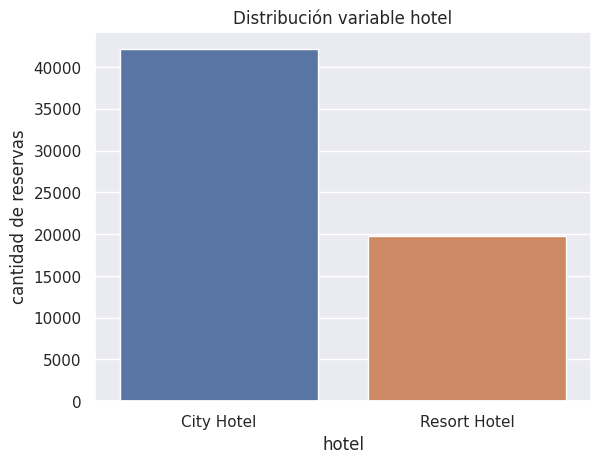

In [13]:
df_count = df['hotel'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable hotel", xlabel='hotel')

Aquí se puede ver la presencia mayoritaria de *City Hotel* previamente mencionada.

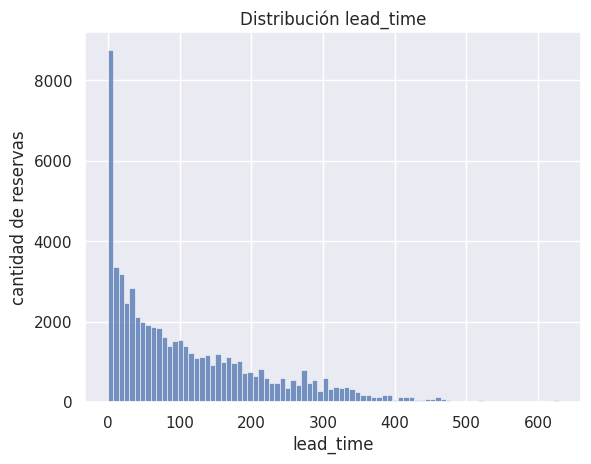

In [14]:
hist=sns.histplot(data=df['lead_time']).set(title="Distribución lead_time",xlabel="lead_time",ylabel="cantidad de reservas")

Se observa que un mayor volumen de reservas poseen un tiempo transcurrido que se encuentra en un rango de valores menores a 10, y a partir de allí, conforme aumenta la cantidad de días, desciende la cantidad de reservas que les corresponde ese valor.

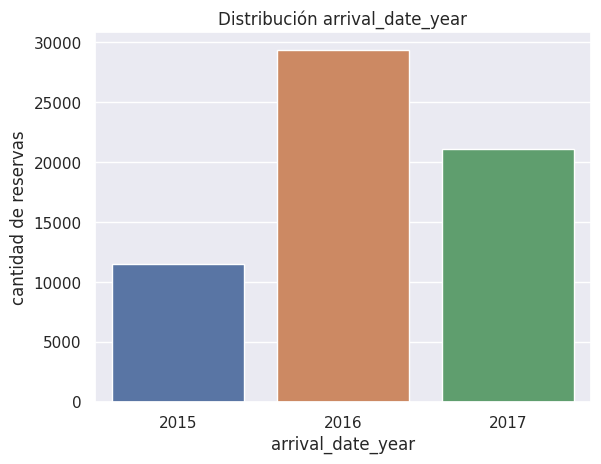

In [15]:
df_count = df['arrival_date_year'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución arrival_date_year", xlabel='arrival_date_year')

La mayoría de las reservas se llevaron a cabo para 2016, y la minoría para 2015.

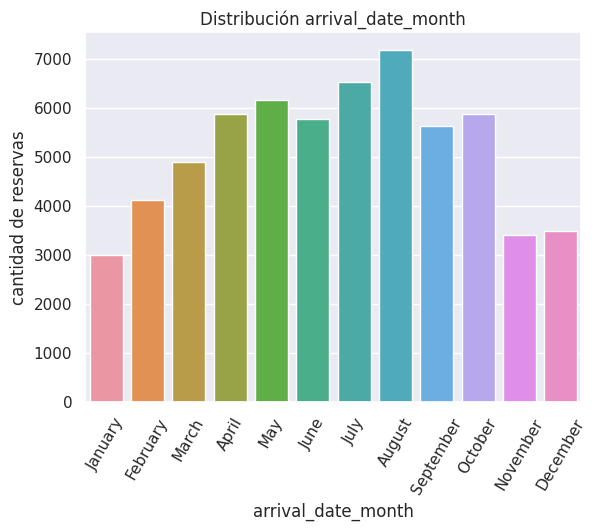

In [16]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_count = df['arrival_date_month'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas', order=months).set(title="Distribución arrival_date_month", xlabel='arrival_date_month')
plt.xticks(rotation=60)
plt.show()

Se ve un ascenso en la cantidad de reservas conforme uno se va desplazando hacia los meses primaverales y veraniegos, teniendo en cuenta que los datos corresponden a hoteles de Portugal. El mes con más reservas corresponde al verano, mientras que el de menor cantidad al invierno.

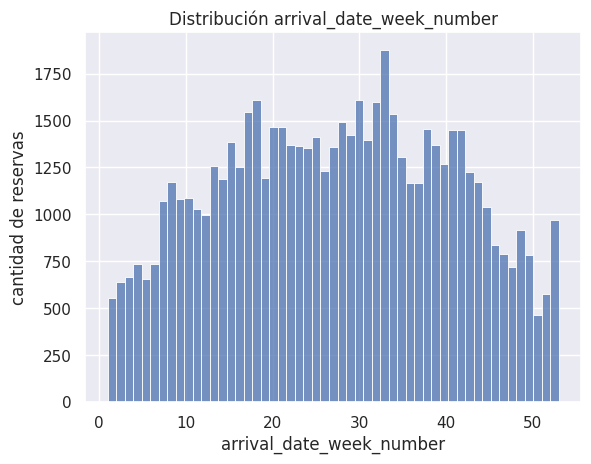

In [17]:
hist=sns.histplot(data=df['arrival_date_week_number'],bins=53).set(title="Distribución arrival_date_week_number",xlabel="arrival_date_week_number",ylabel="cantidad de reservas")

Se nota una tendencia similar a la del gráfico anterior, destacándose ahora ciertas semanas particulares como las que acaparan más reservas en sus respectivos meses. Por ejemplo, la mayoría de las reservas invernales son para fin de año.

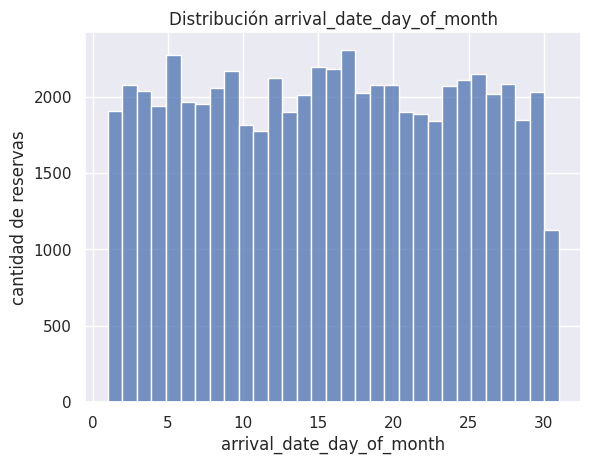

In [18]:
hist=sns.histplot(data=df['arrival_date_day_of_month'],bins=31).set(title="Distribución arrival_date_day_of_month",xlabel="arrival_date_day_of_month",ylabel="cantidad de reservas")

Existe bastante paridad en cuanto a la cantidad de reservas según el día del mes. Únicamente se notan pocas reservas en comparación al resto en el día 31, aunque la razón de esto es que no todos los meses cuentan con este número de días.

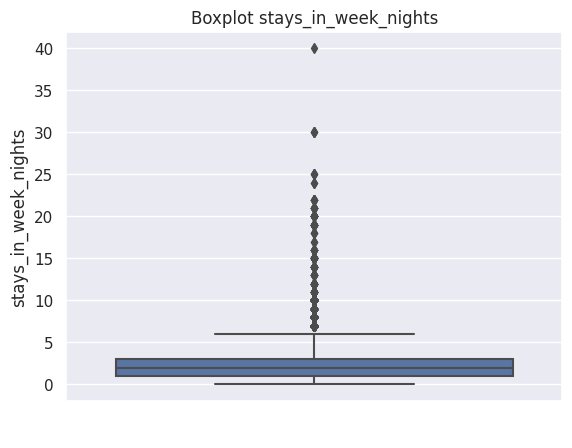

In [19]:
box=sns.boxplot(y="stays_in_week_nights", data=df).set(title="Boxplot stays_in_week_nights",xlabel=" ",ylabel="stays_in_week_nights")

La mayoría de las reservas abarcan entre 1 y 3 días de la semana.

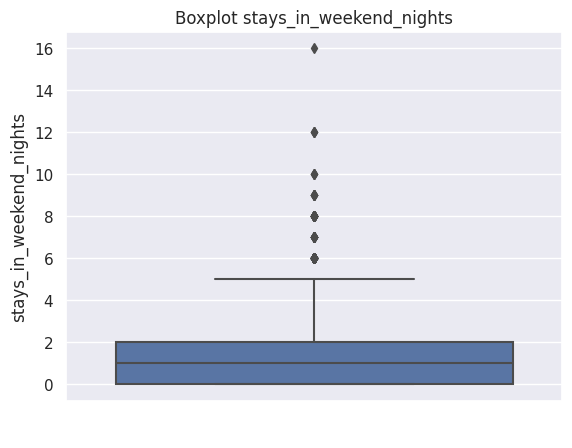

In [20]:
box=sns.boxplot(y="stays_in_weekend_nights", data=df).set(title="Boxplot stays_in_weekend_nights",xlabel=" ",ylabel="stays_in_weekend_nights")

La mayoría no toman días del fin de semana, aunque los siguientes valores más frecuentes son 1 o 2 días.

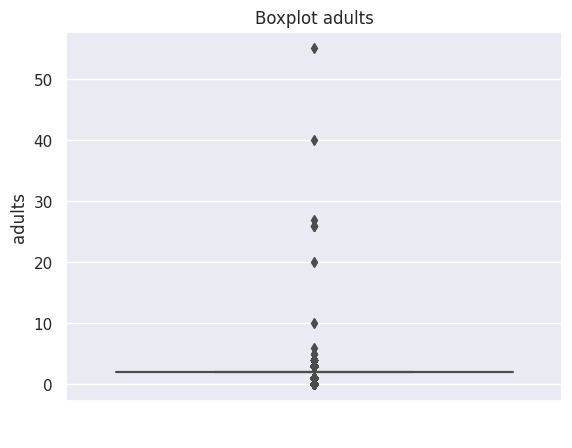

In [21]:
box=sns.boxplot(y="adults", data=df).set(title="Boxplot adults",xlabel=" ",ylabel="adults")

La mayor cantidad de reservas cuenta con 2 huéspedes adultos, y en segunda medida con al menos uno. Algunas pocas incluso no cuentan con ninguno.

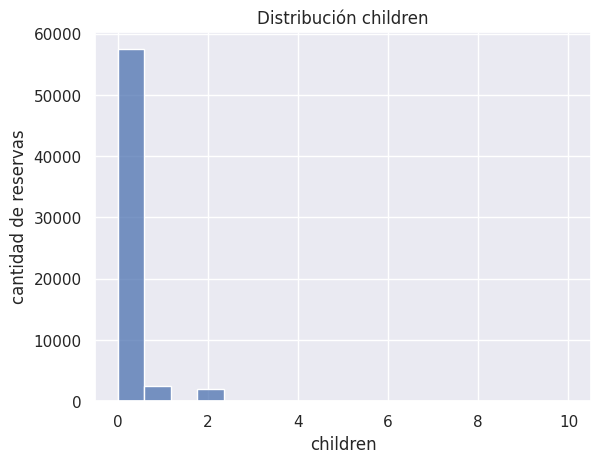

In [22]:
hist=sns.histplot(data=df['children']).set(title="Distribución children",xlabel="children",ylabel="cantidad de reservas")

Más del 90% de las reservas no cuentan con niños, mientras que la mayoría de las que si cuentan poseen 1 o 2.

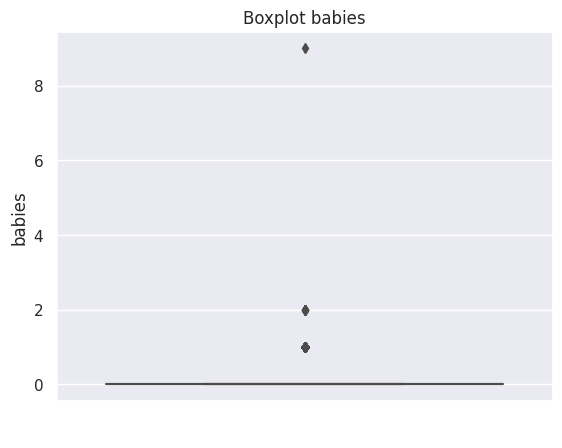

In [23]:
box=sns.boxplot(y="babies", data=df).set(title="Boxplot babies",xlabel=" ",ylabel="babies")

Casi la totalidad de reservas no disponen de bebés. Unas pocas tienen 1, y se aprecia que algunas cuentan con 2 y 9.

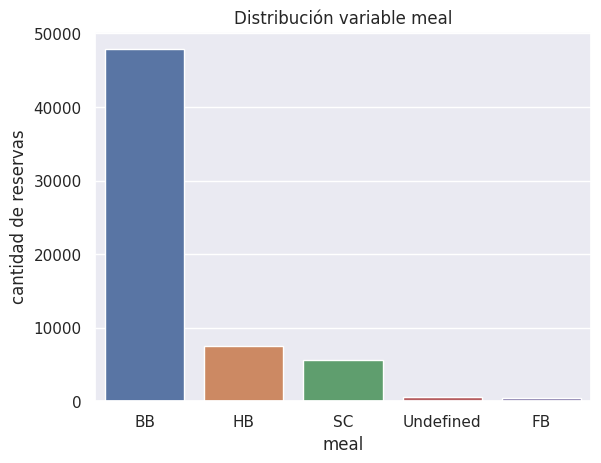

In [24]:
df_count = df['meal'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable meal", xlabel='meal')

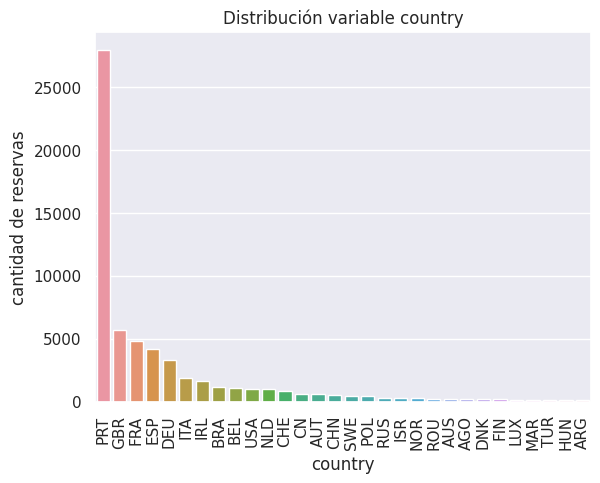

In [25]:
df_count = df['country'].value_counts().reset_index(name='cantidad de reservas')
df_count = df_count[df_count['cantidad de reservas'] > 100].reset_index()
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable country", xlabel='country')
plt.xticks(rotation=90)
plt.show()

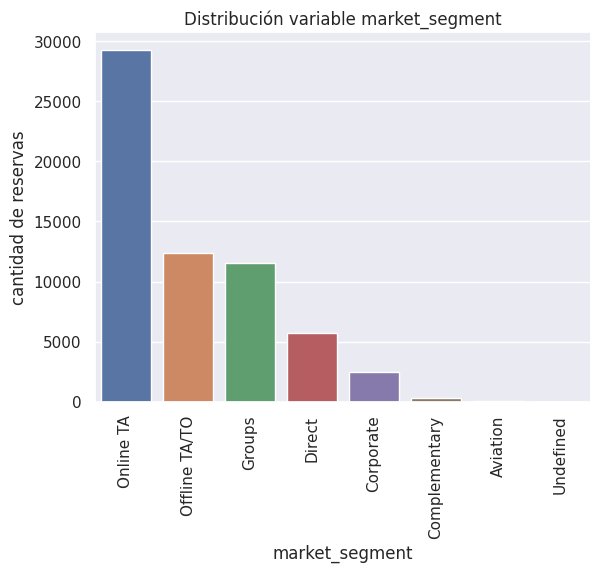

In [26]:
df_count = df['market_segment'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable market_segment", xlabel='market_segment')
plt.xticks(rotation=90)
plt.show()

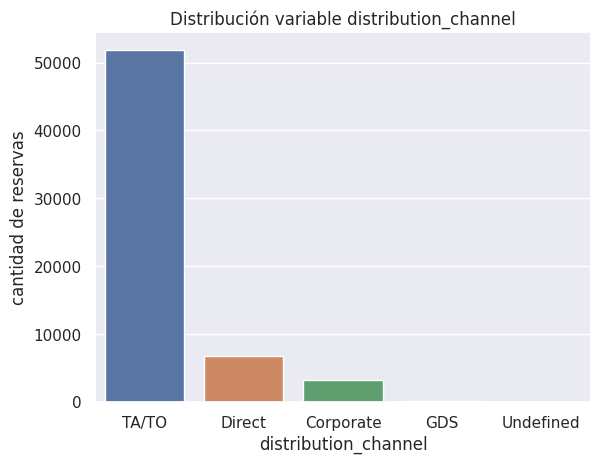

In [27]:
df_count = df['distribution_channel'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable distribution_channel", xlabel='distribution_channel')

Los últimos cuatro gráficos muestran más claramente las frecuencias de las variables *meal*, *country*, *market_segment* y *distribution_channel*, previamente reportadas en la sección de variables cualitativas.

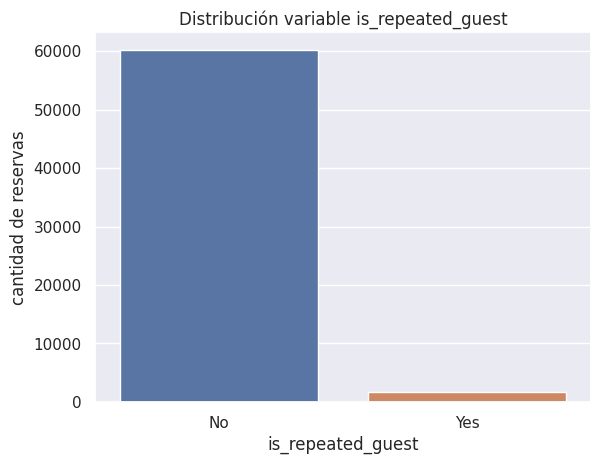

In [28]:
df_count = df['is_repeated_guest'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable is_repeated_guest", xlabel='is_repeated_guest')

Casi la totalidad de las reservas corresponden a nuevos huéspedes.

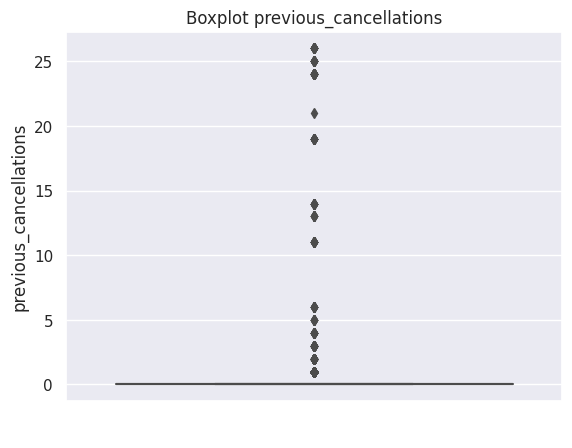

In [29]:
box=sns.boxplot(y="previous_cancellations", data=df).set(title="Boxplot previous_cancellations",xlabel=" ",ylabel="previous_cancellations")

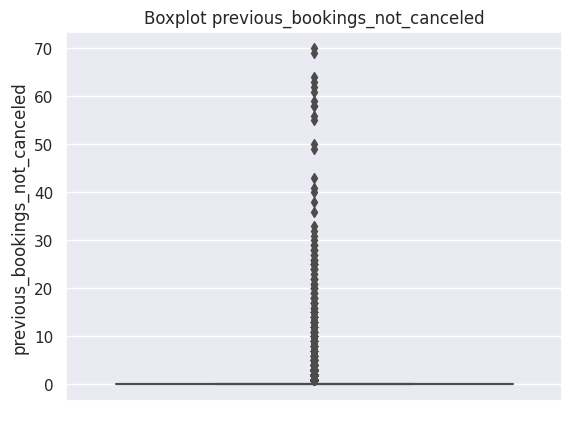

In [30]:
box=sns.boxplot(y="previous_bookings_not_canceled", data=df).set(title="Boxplot previous_bookings_not_canceled",xlabel=" ",ylabel="previous_bookings_not_canceled")

Se ve que tanto las cancelaciones previas como las anteriores reservas no canceladas son en su mayoría 0. Esto guarda cierta correlación con la cantidad de huéspedes nuevos, principalmente las reservas cumplidas

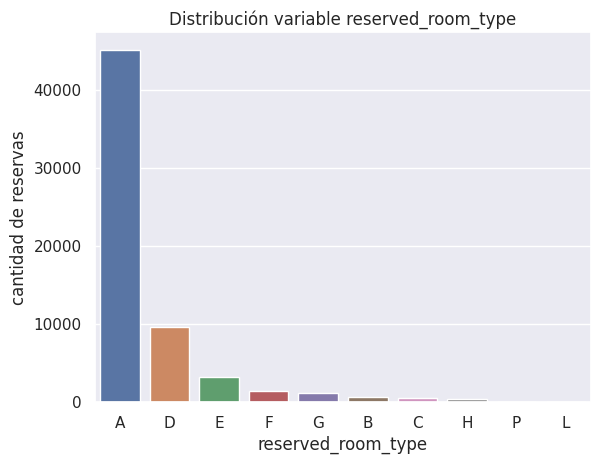

In [31]:
df_count = df['reserved_room_type'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable reserved_room_type", xlabel='reserved_room_type')

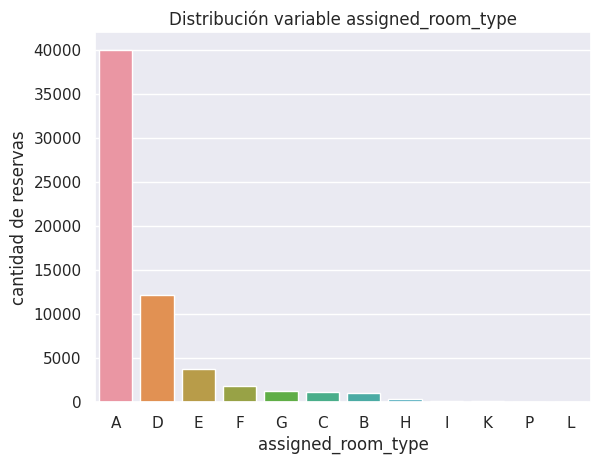

In [32]:
df_count = df['assigned_room_type'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable assigned_room_type", xlabel='assigned_room_type')

Se aprecia que las habitaciones reservadas suelen corresponderse con las habitaciones asignadas.

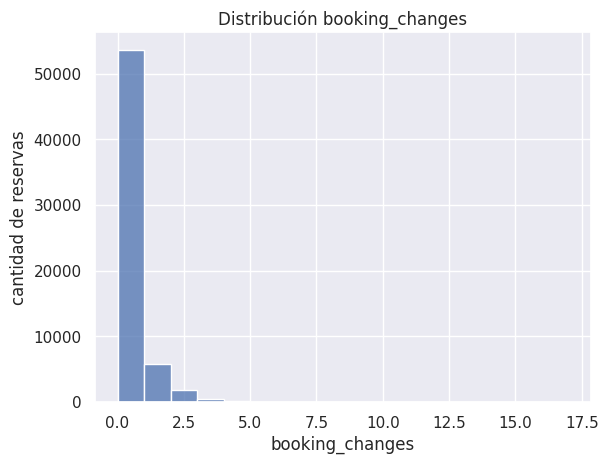

In [33]:
hist=sns.histplot(data=df['booking_changes']).set(title="Distribución booking_changes",xlabel="booking_changes",ylabel="cantidad de reservas")

La gran mayoría no realizaron modificaciones, y dentro de los de si lo hicieron, principalmente fueron una o dos.

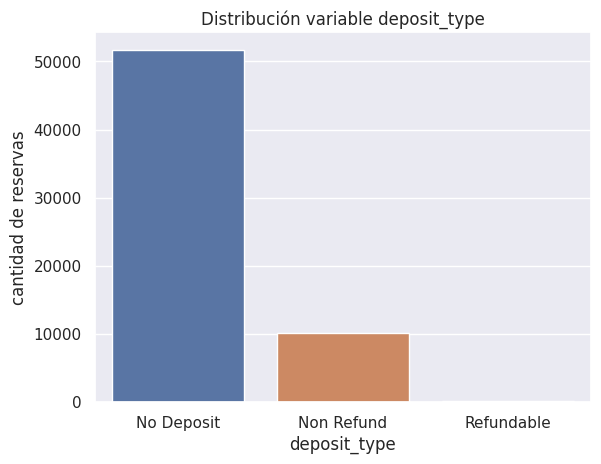

In [34]:
df_count = df['deposit_type'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable deposit_type", xlabel='deposit_type')

En más del 80% de las reservas no hubo depósito.

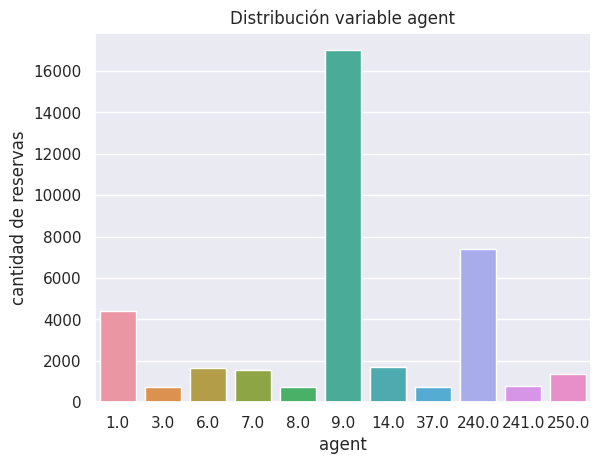

In [35]:
df_count = df['agent'].value_counts().reset_index(name='cantidad de reservas')
df_count = df_count[df_count['cantidad de reservas'] > 700].reset_index()
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable agent", xlabel='agent')

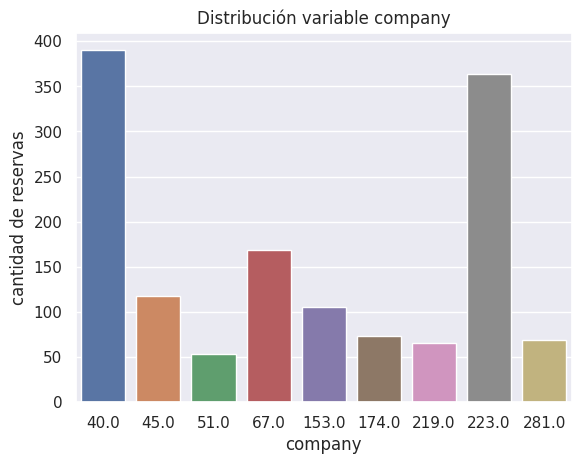

In [36]:
df_count = df['company'].value_counts().reset_index(name='cantidad de reservas')
df_count = df_count[df_count['cantidad de reservas'] > 50].reset_index()
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable company", xlabel='company')

Asi lucen las distribuciones originales de los valores que toman las variables *agent* y *company*. Dado que son las variables con mayor porcentaje de datos faltantes, serán tratadas en la sección dedicada a esa cuestión, por lo que estos gráficos sufrirán modificaciones.

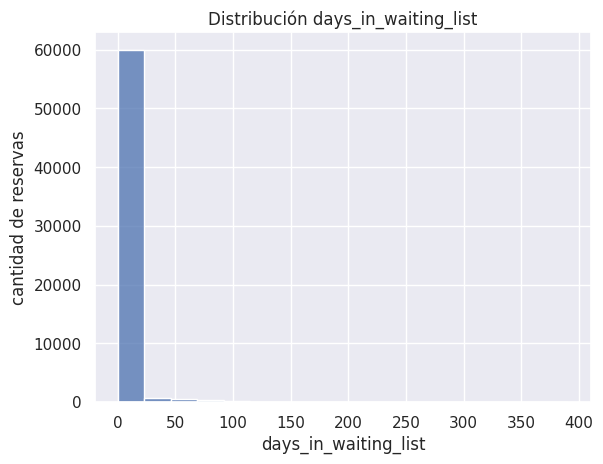

In [37]:
hist=sns.histplot(data=df['days_in_waiting_list']).set(title="Distribución days_in_waiting_list",xlabel="days_in_waiting_list",ylabel="cantidad de reservas")

Más del 95% de las reservas no pasaron ni un día en la lista de espera.

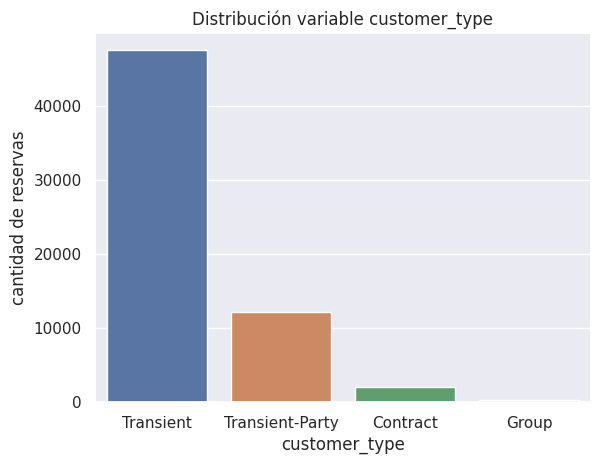

In [38]:
df_count = df['customer_type'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable customer_type", xlabel='customer_type')

Podemos observar que el tipo de cliente que está implicado en la mayor cantidad de reservas es "Transient", es decir, un cliente cuya reserva no es parte de ningun grupo o contrato, y tampoco está relacionada a otra reserva transitoria.

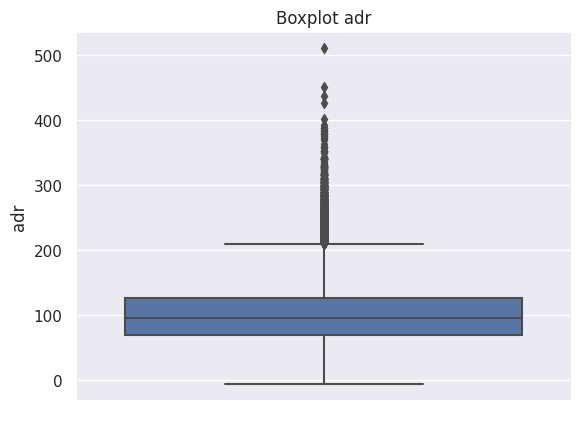

In [39]:
box=sns.boxplot(y="adr", data=df).set(title="Boxplot adr",xlabel=" ",ylabel="adr")

La mayoría de los valores del ADR se encuentran en un rango entre 70 y 126, con una mediana de 95.

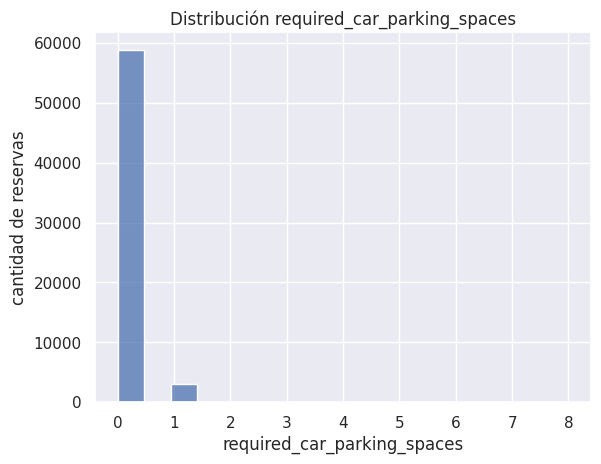

In [40]:
hist=sns.histplot(data=df['required_car_parking_spaces']).set(title="Distribución required_car_parking_spaces",xlabel="required_car_parking_spaces",ylabel="cantidad de reservas")

Muy pocas reservas necesitaron espacios de estacionamiento, y las que lo hicieron solían requerir solamente uno.

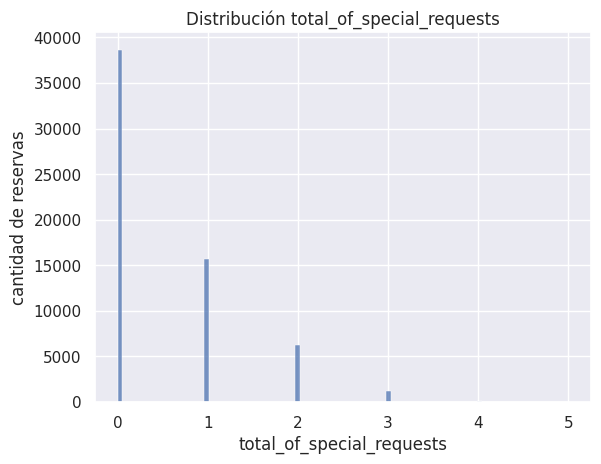

In [41]:
hist=sns.histplot(data=df['total_of_special_requests']).set(title="Distribución total_of_special_requests",xlabel="total_of_special_requests",ylabel="cantidad de reservas")

Mayoritariamente no hubo pedidos especiales, y conforme más pedidos existieron menos cantidad de reservas contaron con esta característica.

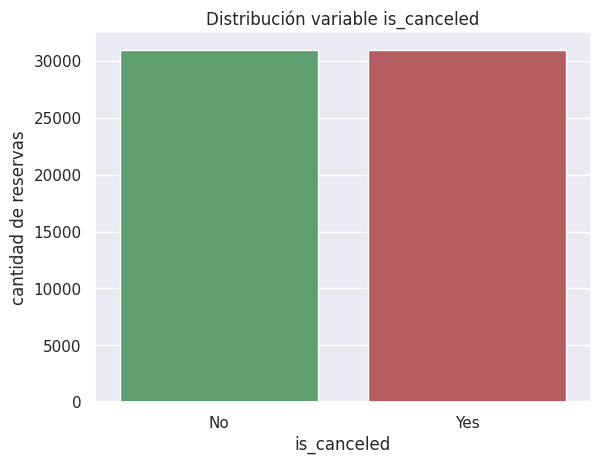

In [42]:
df_count = df['is_canceled'].value_counts().reset_index(name='cantidad de reservas')
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas',palette=['g','r']).set(title="Distribución variable is_canceled", xlabel='is_canceled')

Como se habia mencionado, ambos valores estan totalmente parejos.

### **Correlaciones entre las variables**

Durante la visualización de las variables se pudieron apreciar ciertas correlaciones, como la cantidad de reservas por mes respecto a la cantidad por semana, las habitaciones reservadas contra las asignadas o los nuevos huéspedes como motivo del número de reservas previas no mantenidas o no canceladas.
Aqui se observara si existe la presencia de alguna otra correlación marcada entre ciertas variables numéricas.

<ipython-input-43-340d97ff87bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df.loc[:,~df.columns.isin(['agent', 'company'])].corr()


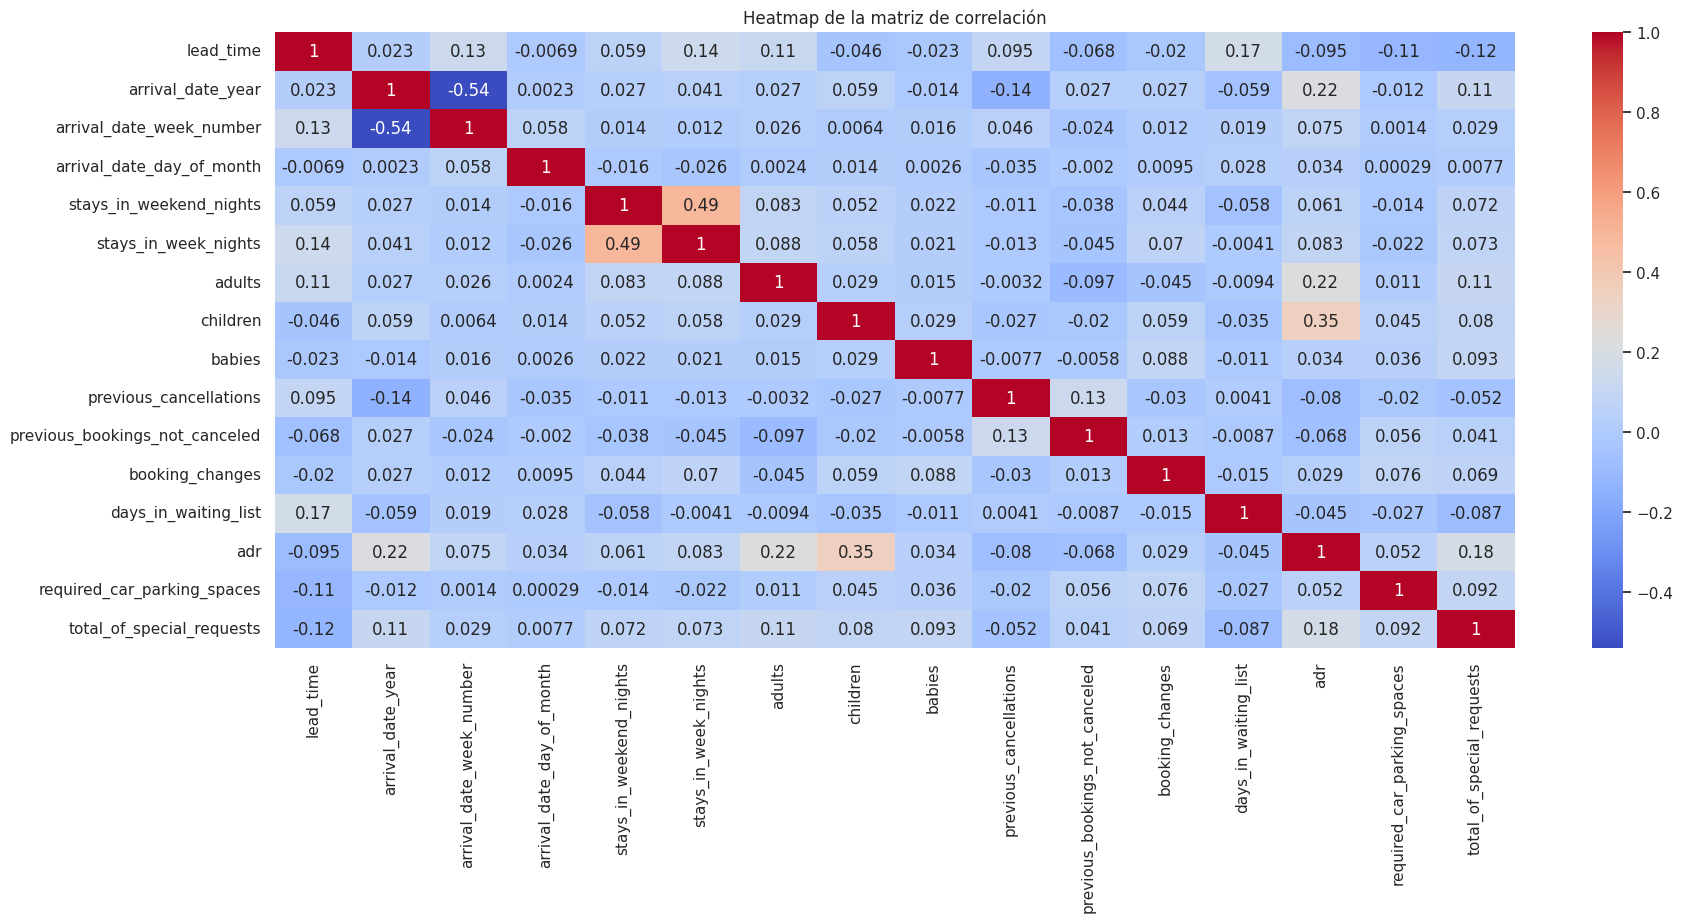

In [43]:
matriz_corr = df.loc[:,~df.columns.isin(['agent', 'company'])].corr()
plt.figure(figsize = (20,8))
plt.title('Heatmap de la matriz de correlación')
heat=sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Las únicas correlaciones relativamente altas que se perciben son entre **stays_in_weekend_nights** y **stays_in_week_nights** (correlación positiva), y entre **arrival_date_week_number** y **arrival_date_year** (correlación negativa). Se veran a continuación sus gráficos de dispersión:

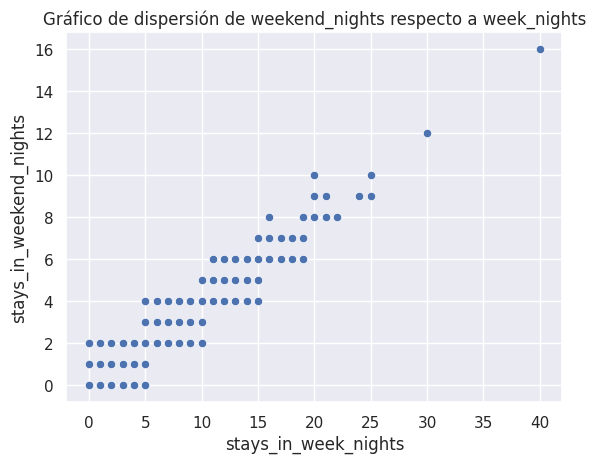

In [44]:
sca=sns.scatterplot(data=df, x='stays_in_week_nights', y='stays_in_weekend_nights').set(title='Gráfico de dispersión de weekend_nights respecto a week_nights')

La correlación aquí es entendible ya que más días de estadía durante la semana conlleva más días de estadía durante el fin de semana, debido a que los clientes se quedarán una/s semana/s de corrido.

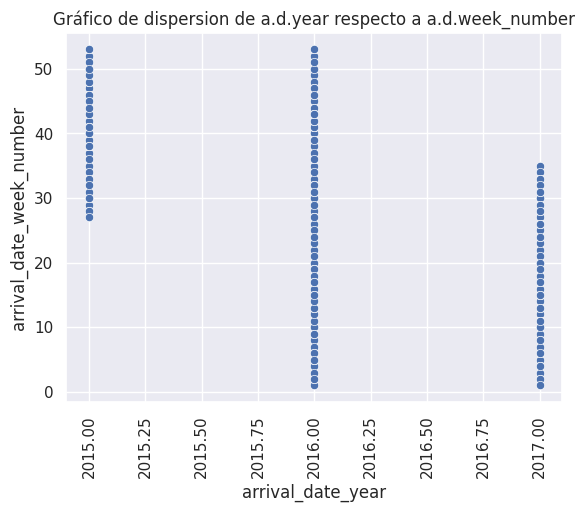

In [45]:
sca=sns.scatterplot(data=df, x='arrival_date_year', y='arrival_date_week_number').set(title='Gráfico de dispersion de a.d.year respecto a a.d.week_number')
plt.xticks(rotation=90)
plt.show()

La correlación aquí es negativa ya que el año de la fecha de llegada solo toma valores enteros como lo son 2015, 2016 y 2017; y el momento del año de la reserva se determina con la variable "date_week_number".
Aunque la correlación sea negativa, sabemos que estas variables no tienen relación alguna entre sí (son independientes) por lo que no tiene sentido compararlas.

### **Relación de las variables con el target**

En esta sección, iremos analizando variable por variable su relación con el target "is_canceled".

Hicimos las siguientes funciones para graficar las variables en relación al target:

In [46]:
def barplot_related_to_is_canceled(df, var, minimum_number_of_total_reservations=None, order=None, xticks_rotation=0):
  df_count = df.groupby("is_canceled")[var].value_counts().reset_index(name='cantidad de reservas')

  if minimum_number_of_total_reservations != None:
    df_total_count = df.groupby(var)['is_canceled'].count().reset_index(name='cantidad de reservas total')
    df_total_count = df_total_count[df_total_count['cantidad de reservas total'] > minimum_number_of_total_reservations]
    df_count = df_count.merge(df_total_count, on=var)

  sns.barplot(data=df_count, x=var, y='cantidad de reservas', hue='is_canceled', hue_order=['Yes', 'No'], palette=["r", "g"], order=order).set(title=f"Barplot {var} en función de is_canceled")
  plt.xticks(rotation=xticks_rotation)
  plt.show()

In [47]:
def boxplot_related_to_is_canceled(df, var):
  sns.boxplot(x='is_canceled',y=var, data=df, palette=["r", "g"]).set(title=f"Boxplot {var} en función de is_canceled")

In [48]:
def heatmap_ralated_to_is_canceled(df, var):
  tab = pd.crosstab(df[var], df['is_canceled'])
  sns.heatmap(tab, annot=True, fmt='g', cmap="crest")

*   **hotel**



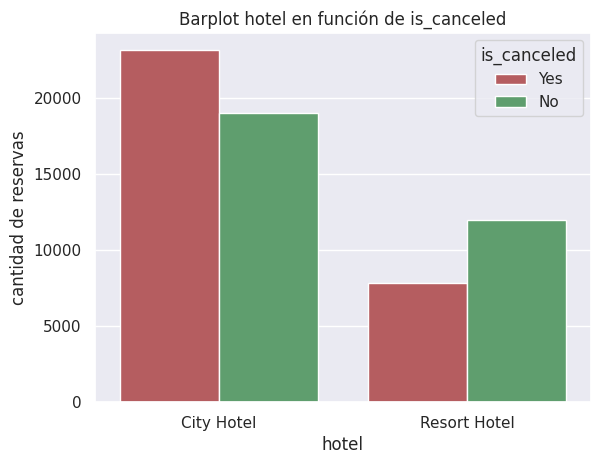

In [49]:
barplot_related_to_is_canceled(df, 'hotel')

Con este gráfico podemos ver que la mayoría de las resevas en City Hotel fueron canceladas mientras que en el Resort Hotel sucedió lo contrario.

*   **lead_time**



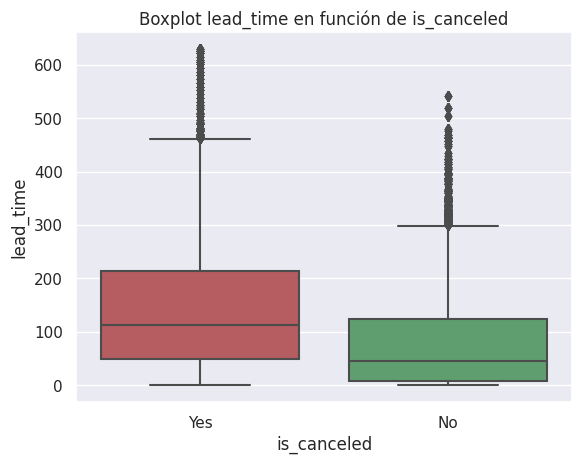

In [50]:
boxplot_related_to_is_canceled(df, 'lead_time')

En este gráfico podemos observar que hubo una mayor cantidad de reservas que fueron canceladas que tenían una mayor cantidad de días entre que se realizó la reserva y la fecha de llegada al hotel por sobre las que tenían una menor cantidad de días. 

*   **arrival_date_year**
*   **arrival_date_month**
*   **arrival_date_week_number**
*   **arrival_date_day_of_month**



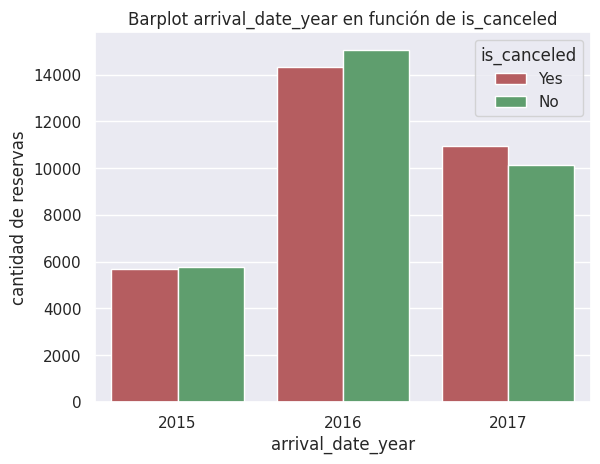

In [51]:
barplot_related_to_is_canceled(df, 'arrival_date_year')

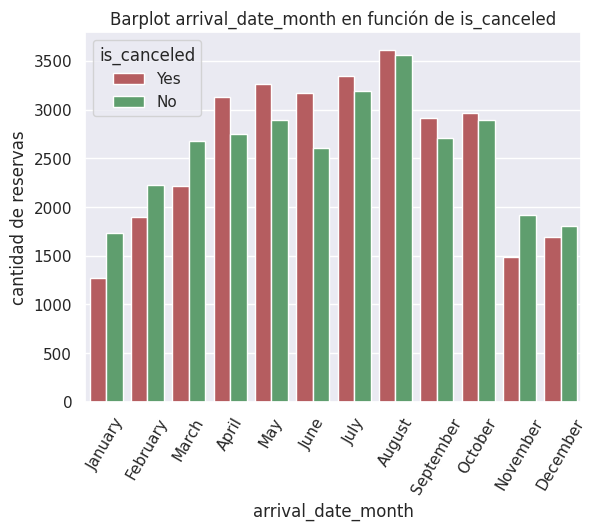

In [52]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
barplot_related_to_is_canceled(df, 'arrival_date_month', order=months_order, xticks_rotation=60)

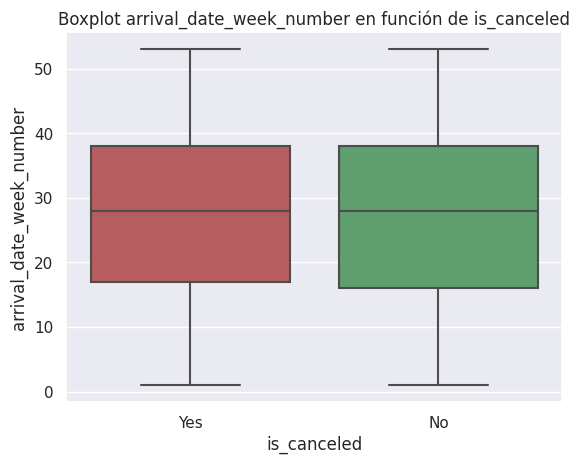

In [53]:
boxplot_related_to_is_canceled(df, 'arrival_date_week_number')

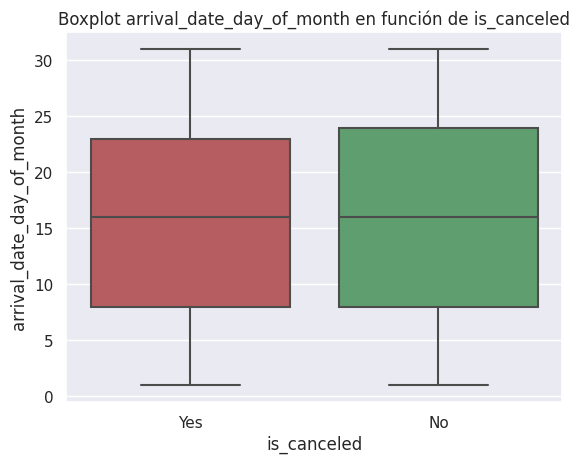

In [54]:
boxplot_related_to_is_canceled(df, 'arrival_date_day_of_month')

En general, no vemos ninguna diferencia significativa en los gráficos realizados de las variables en cuestión respecto al target. Sin embargo, con respecto a la variable "arrival_date_month" podemos ver que hay ciertos meses en los que hubo una mayor cantidad de cancelaciones de las que no, y en otros lo contrario (por ejemplo, en junio la cantidad de reservas canceladas superó a las que no, y en noviembre al revés).

*   **stays_in_weekend_nights**
*   **stays_in_week_nights**



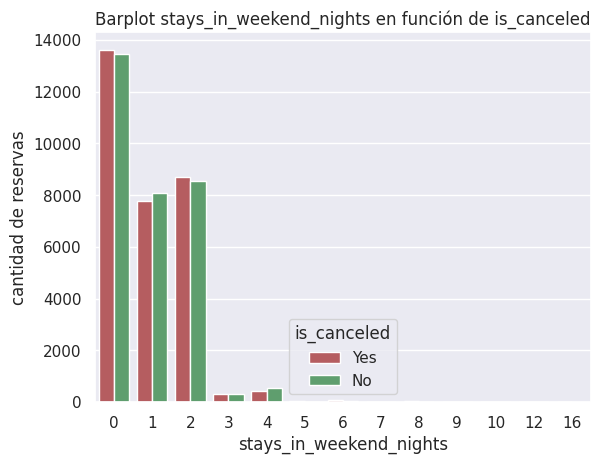

In [55]:
barplot_related_to_is_canceled(df, 'stays_in_weekend_nights')

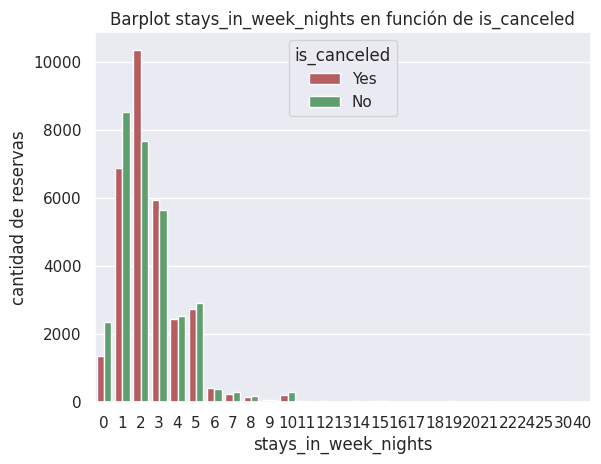

In [56]:
barplot_related_to_is_canceled(df, 'stays_in_week_nights')

No se ve una diferencia importante entre las cancelaciones en el gráfico de "stays_in_weekend_nights", por el contrario en el de "stays_in_week_nights" se ve un número de cancelaciones percibiblemente más alto que su contraparte cuando se trata de dos días, mientras que se ve una diferencia notable de no cancelaciones cuando se trata de uno o ningun día.

*   **adults**
*   **children**
*   **babies**

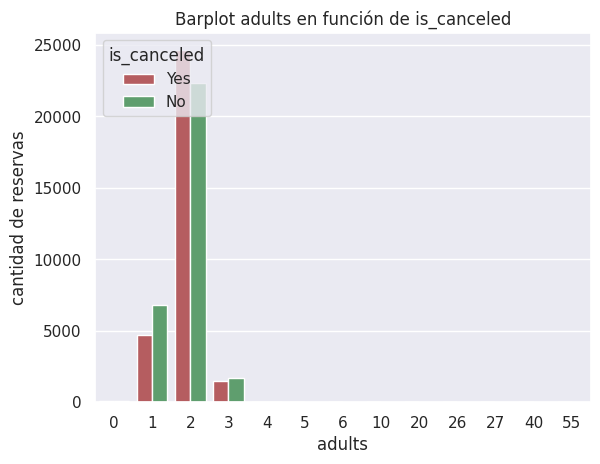

In [57]:
barplot_related_to_is_canceled(df, 'adults')

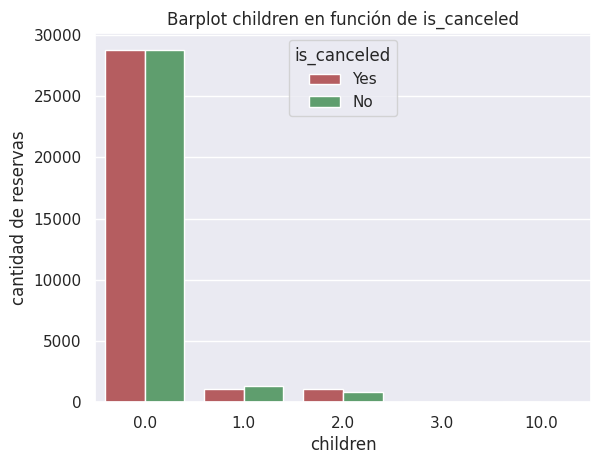

In [58]:
barplot_related_to_is_canceled(df, 'children')

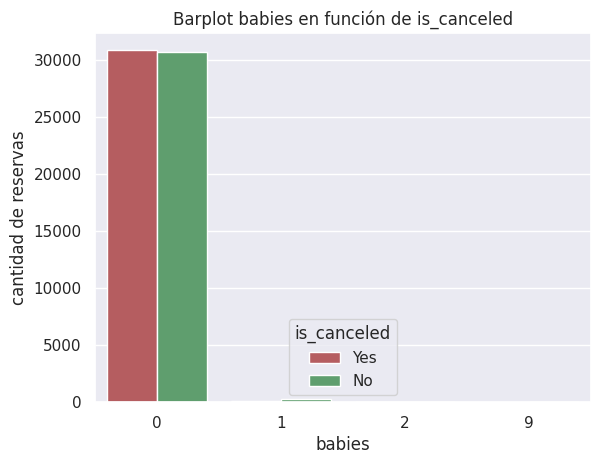

In [59]:
barplot_related_to_is_canceled(df, 'babies')

Se percibe un número de cancelaciones levemente mayor cuando se cuenta con dos adultos, y un número menor cuando se cuenta con uno. En cuanto a los niños y bebes, no se deja ver ninguna diferencia.

*   **meal**




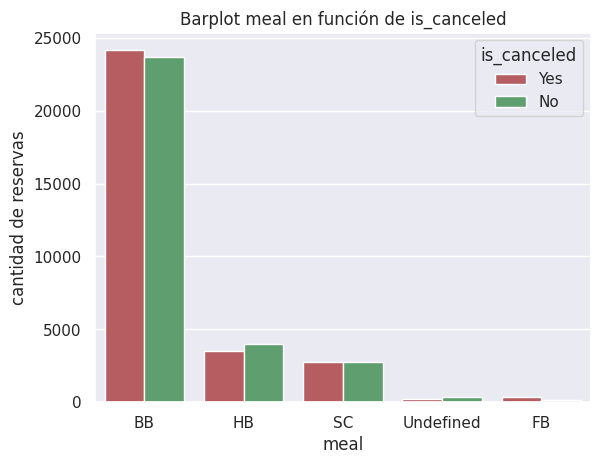

In [60]:
barplot_related_to_is_canceled(df, 'meal')

No se observa ninguna diferencia significativa en ninguno de los valores.

*   **country**



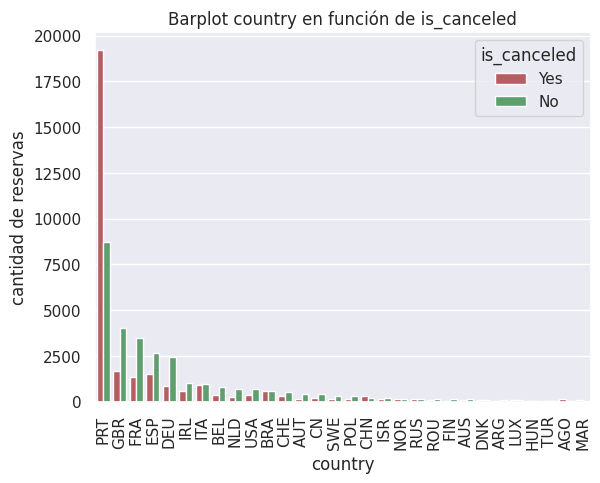

In [61]:
barplot_related_to_is_canceled(df, 'country', minimum_number_of_total_reservations=100, xticks_rotation=90)

Para analizar la variable "country" en función del target, decidimos graficar los casos en los que las reservas (canceladas o no) superan la cantidad de 100. Esto lo hicimos para poder observar los datos más influyentes de dicha variable de una mejor manera.

En el gráfico podemos ver que, por un lado, la mayoría de los países observables poseen un número de reservas no canceladas superior al de las que sí; por otro lado, en Portugal, país con mayor cantidad de reservas realizadas, las cancelaciones conforman más de la mitad de ellas.

Cabe aclarar que Portugal es el país con mayor cantidad de reservas ya que, según el paper, los hoteles analizados están ubicados en dicho país.

*   **market_segment**
*   **distribution_channel**

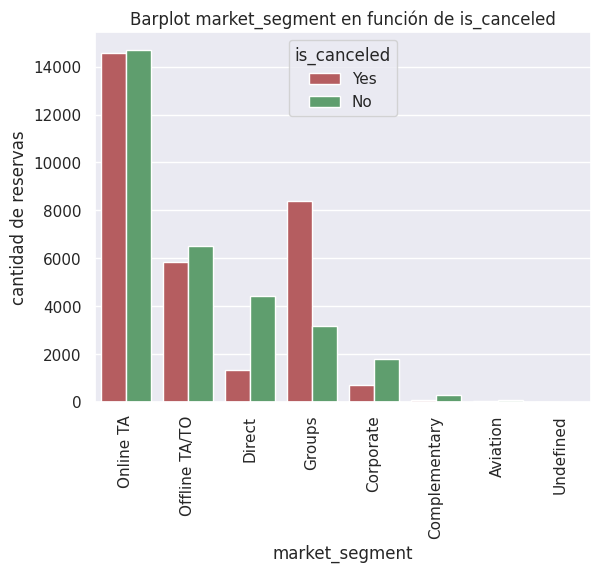

In [62]:
barplot_related_to_is_canceled(df, 'market_segment', xticks_rotation=90)

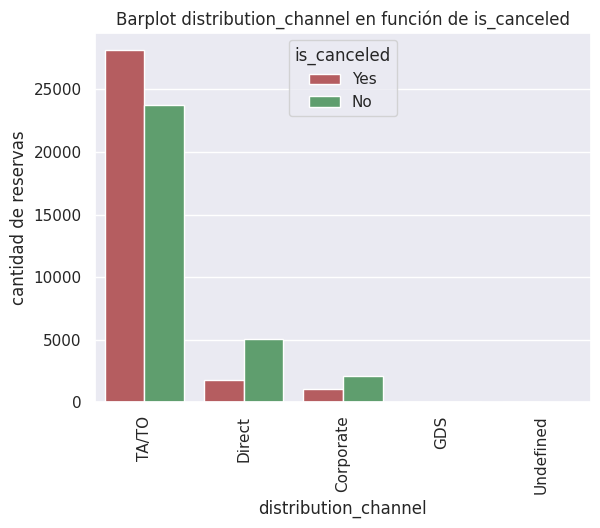

In [63]:
barplot_related_to_is_canceled(df, 'distribution_channel', xticks_rotation=90)

Analizando el gráfico de "market_segment" podemos ver que la mayoría de los grupos han cancelado sus reservas mientras que los que se contactaron de forma directa o por corporaciones lo contrario.

En cuanto a "distribution_channel", la mayoría de las personas que realizaron sus reservas a través de agentes de viaje u operadores turísticos han cancelado sus reservas.

*   **is_repeated_guest**

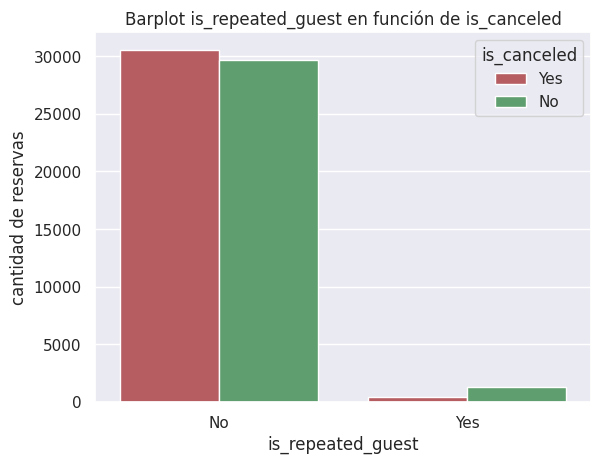

In [64]:
barplot_related_to_is_canceled(df, 'is_repeated_guest')

En esta ilustración las diferencias no son muy significativas respecto a si un cliente ya ha hecho alguna reserva anteriormente o no.

*   **previous_cancellations**
*   **previous_bookings_not_canceled**

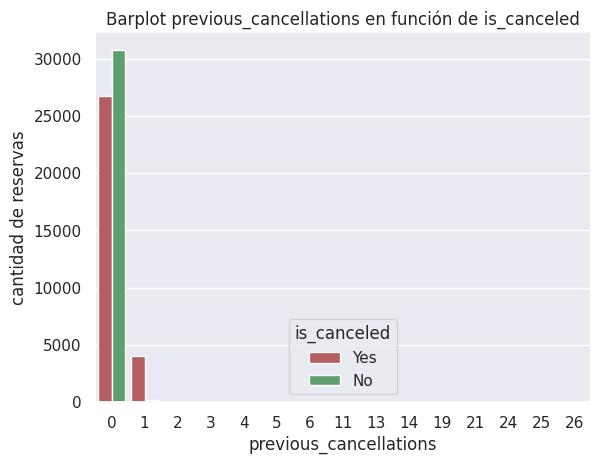

In [65]:
barplot_related_to_is_canceled(df, 'previous_cancellations')

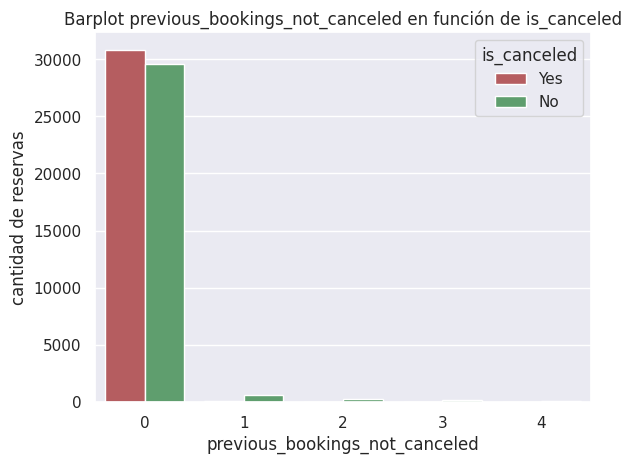

In [66]:
barplot_related_to_is_canceled(df, 'previous_bookings_not_canceled', minimum_number_of_total_reservations=100)

Visualizando la relación del target con la variable "previous_cancellations", interpretamos que la mayoría de las personas que no hicieron cancelación previa de una reserva tampoco cancelaron su reserva actual. Sin embargo, quienes sí han cancelado una reserva, casi el total de ellos cancelaron también su reserva actual.

En el gráfico que le sigue, vemos que quienes hicieron alguna reserva previa y no la cancelaron tampoco cancelaron la reserva actual. Respecto a quienes no tienen ninguna reserva previa no cancelada, no observamos gran diferencia entre reservas canceladas y no canceladas.

*   **reserved_room_type**
*   **assigned_room_type**

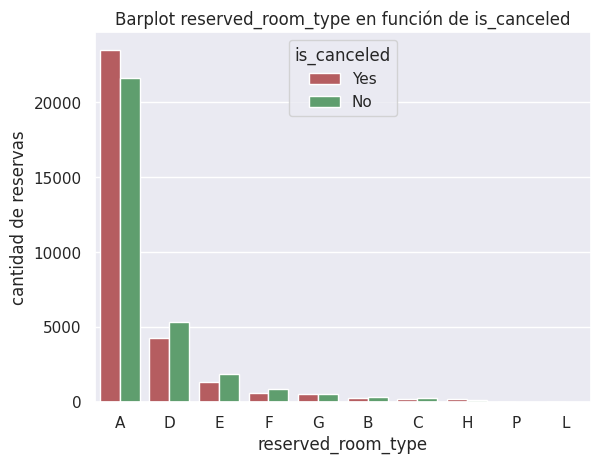

In [67]:
barplot_related_to_is_canceled(df, 'reserved_room_type')

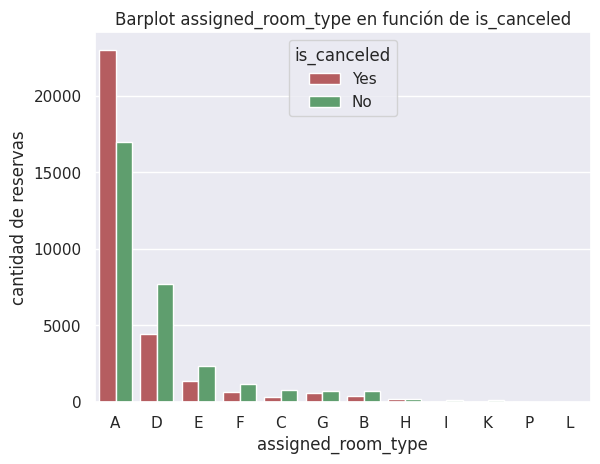

In [68]:
barplot_related_to_is_canceled(df, 'assigned_room_type')

Analizando ambos esquemas, apreciamos que tanto en la situación en la que se reservó el tipo A de habitación como en la que lo asignó, la cantidad de reservas canceladas supera a las no canceladas. En los demás casos como las habitaciones del tipo D, E, F, entre otros, ocurre lo contrario.

*   **booking_changes**

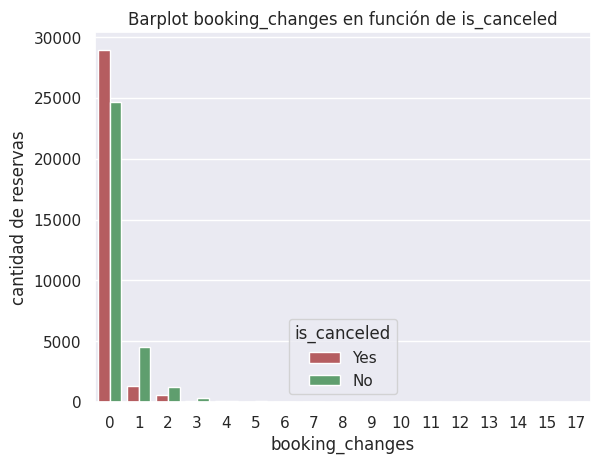

In [69]:
barplot_related_to_is_canceled(df, 'booking_changes')

En este diagrama, contemplamos que mayor cantidad de reservas que tuvieron algún cambio no fueron canceladas, mientras que las que no sufrieron ningún cambio poseen un número mayor de cancelaciones.

*   **deposit_type**

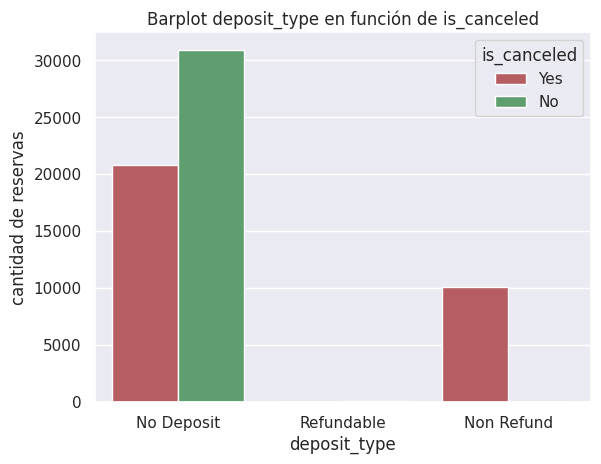

In [70]:
barplot_related_to_is_canceled(df, 'deposit_type')

Aunque no observemos las barras de "Refundable" y la barra verde de "Non Refund", no significa que no existan casos para estas situaciones, sino que la cantidad de éstos es muy pequeña comparada al resto. Esto lo podemos ver en el siguiente heatmap.

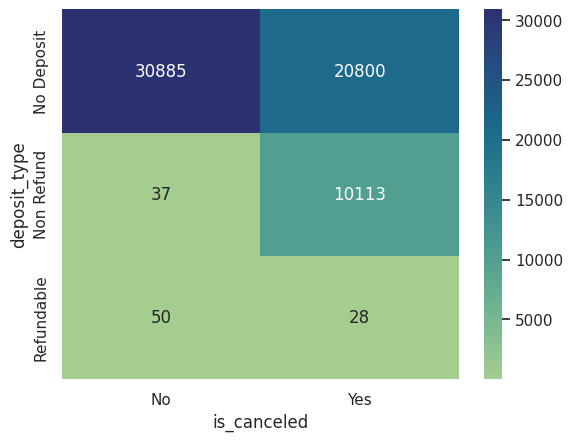

In [71]:
heatmap_ralated_to_is_canceled(df, 'deposit_type')

Respecto a los tipos de depósito, la mayor cantidad de reservas en las que no se realizó depósito alguno para garantizarla no fueron canceladas. Sin embargo, cuando se hizo un depósito por el costo total de la reserva (o incluso mayor al costo total de la estadía) observamos una cantidad significativa de cancelaciones.

* **agent**

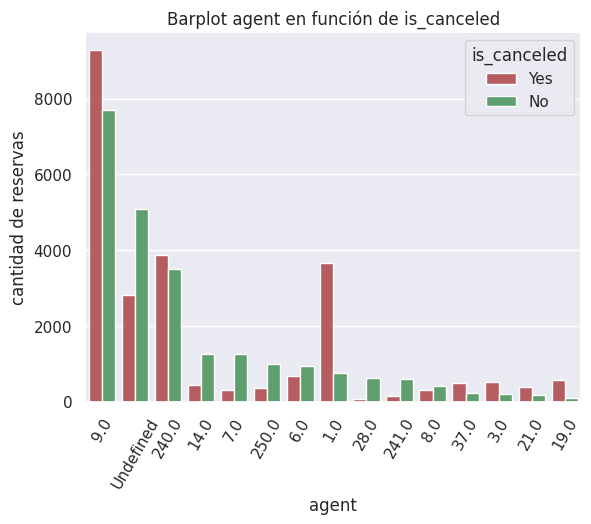

In [72]:
df_agent_and_is_canceled = pd.DataFrame(df[["agent", "is_canceled"]].fillna("Undefined"))
barplot_related_to_is_canceled(df_agent_and_is_canceled, 'agent', minimum_number_of_total_reservations=500, xticks_rotation=60)

En el gráfico podemos ver las reservas canceladas y no canceladas de los agentes que realizaron más de 500 (elegimos este número para poder analizar los agentes más significativos). Además, incluímos aquellas reservas cuyo campo de "agent" se encontraba vacío y los categorizamos como "Undefined" (estos representan una parte importante del total de reservas, aproximadamente un 12,7%).
Podemos observar que el agente 9 fue quien realizó una mayor cantidad de reservas, las cuales fueron más canceladas de las que no. Incluso, la mayoría de las reservas cuyo campo de "agent" se encontraba vacío no fueron canceladas. También, el agente 1 tiene muchas más reservas canceladas en comparación a las no canceladas. El agente 240 tiene una cantidad considerable de reservas realizadas pero no hay una gran diferencia entre las canceladas y no canceladas.

* **company**

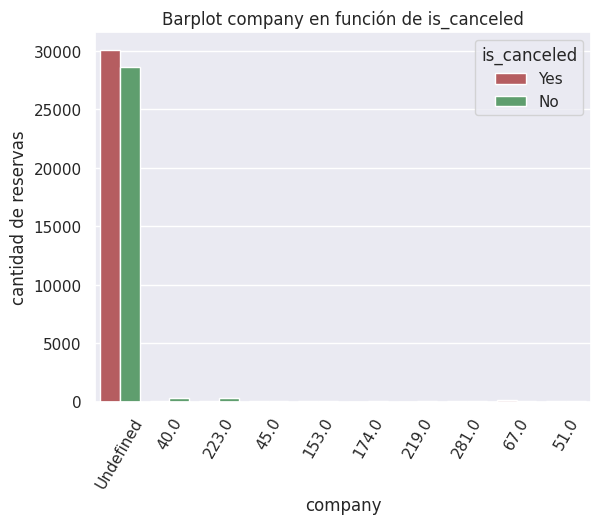

In [73]:
df_company_and_is_canceled = pd.DataFrame(df[["company", "is_canceled"]].fillna("Undefined"))
barplot_related_to_is_canceled(df_company_and_is_canceled, 'company', minimum_number_of_total_reservations=50, xticks_rotation=60)


Este gráfico de barras nos muestra que la mayor cantidad de reservas tienen vacío el campo "company". De estas, la cantidad de cancelaciones es mayor que las no canceladas (aunque la diferencia no es muy grande).

* **days_in_waiting_list**

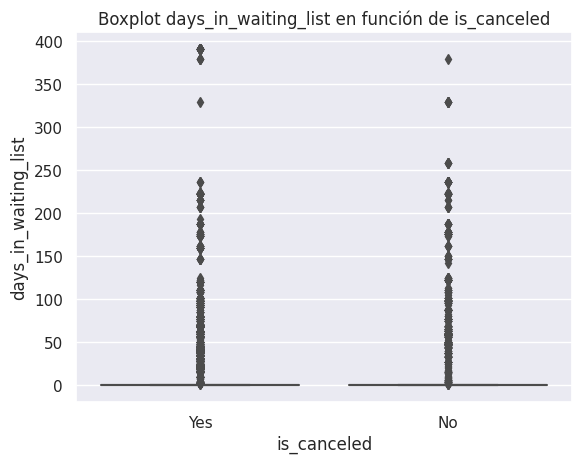

In [74]:
boxplot_related_to_is_canceled(df, 'days_in_waiting_list')

In [75]:
df["days_in_waiting_list"].value_counts()

0      59678
39       155
31        90
44        83
58        82
       ...  
81         1
121        1
97         1
193        1
105        1
Name: days_in_waiting_list, Length: 116, dtype: int64

In [76]:
df.groupby("is_canceled")["days_in_waiting_list"].value_counts()

is_canceled  days_in_waiting_list
No           0                       30377
             58                         82
             87                         36
             122                        34
             48                         22
                                     ...  
Yes          121                         1
             125                         1
             175                         1
             193                         1
             330                         1
Name: days_in_waiting_list, Length: 180, dtype: int64

A partir del gráfico y los datos mostrados, podemos analizar que la mayor cantidad de reservas (aproximadamente un 96,4% del total) no estuvieron en la lista de espera. Además, de este 96,4%, la cantidad de reservas que fueron canceladas y de las que no lo fueron son muy similares (30377 no fueron canceladas, mientras que 29301 sí).

Por lo tanto, concluimos que la variable "days_in_waiting_list" no será determinante a la hora de realizar las futuras predicciones.

* **customer_type**

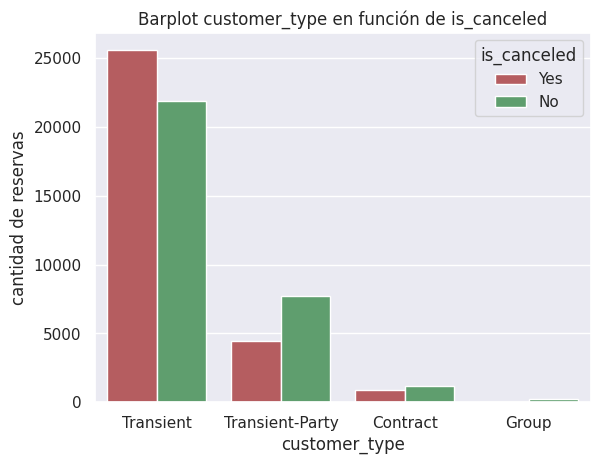

In [77]:
barplot_related_to_is_canceled(df, 'customer_type')

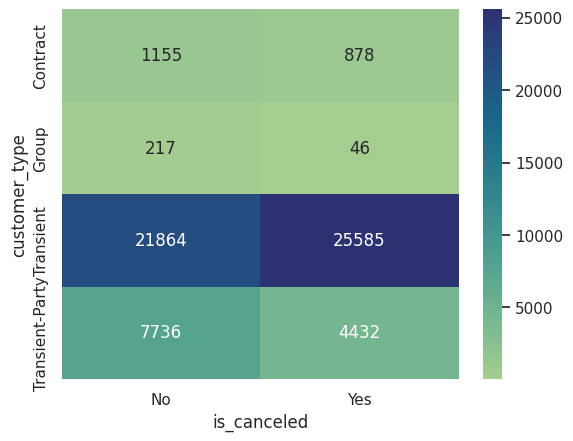

In [78]:
heatmap_ralated_to_is_canceled(df, 'customer_type')

Se nota una cantidad de cancelaciones levemente superior en el valor "Transient", ocurriendo lo opuesto en el valor "Transient-Party"

* **adr**

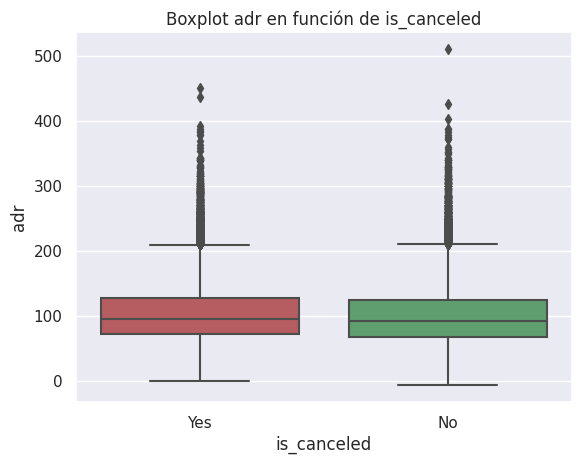

In [79]:
boxplot_related_to_is_canceled(df, 'adr')

Relacionando a la variable "adr" con el target, no apreciamos a simple vista alguna diferencia significativa.

* **required_car_parking_spaces**

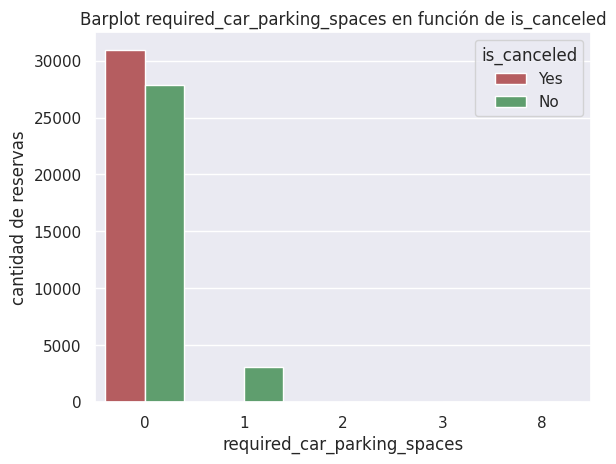

In [80]:
barplot_related_to_is_canceled(df, 'required_car_parking_spaces')

Se observan cancelaciones unicamente cuando no se requirieron espacios de estacionamiento, que incluso superan ligeramente a las reservas sin cancelar en dicho valor.

* **total_of_special_requests**

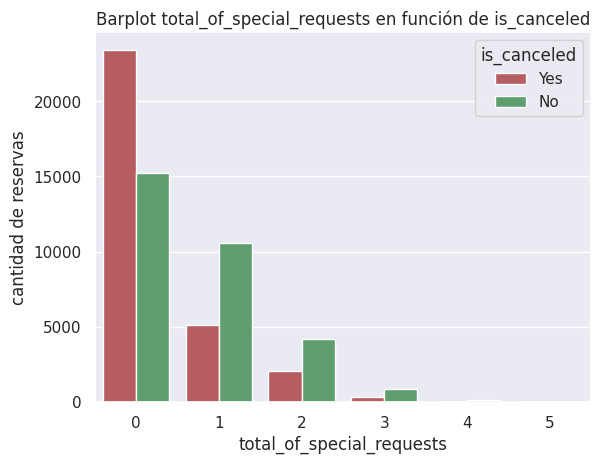

In [81]:
barplot_related_to_is_canceled(df, 'total_of_special_requests')

Se aprecia que cuando existieron pedidos especiales la cantidad de cancelaciones fue menor a las reservas no canceladas. En cambio, cuando no hubo ningún pedido especial, la cantidad de reservas canceladas supera a la cantidad de las que no lo fueron.

## **b) Visualización de los datos**

En esta sección, realizaremos distintos gráficos con el fin de mostrar las observaciones más significativas basadas en lo analizado en la sección anterior.

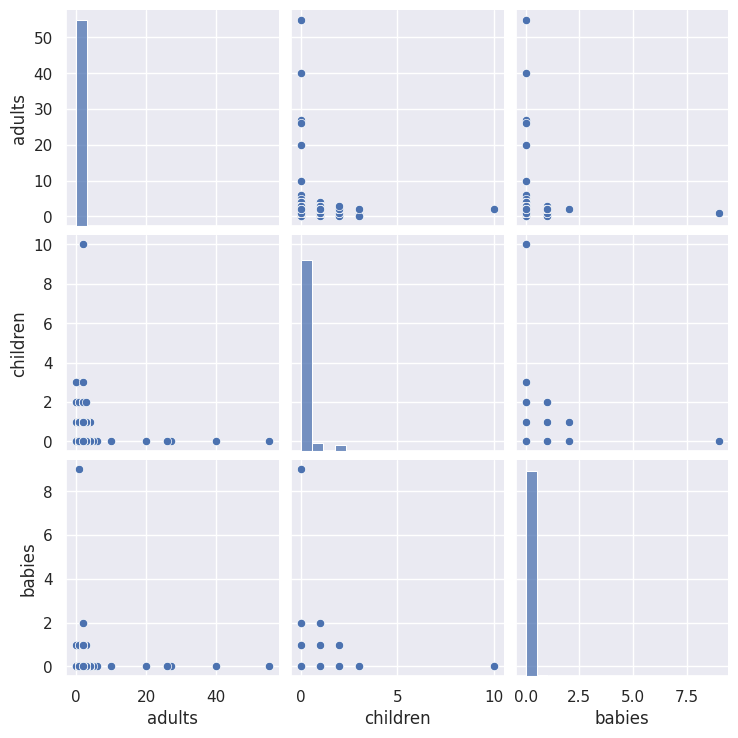

In [82]:
sns.pairplot(df.loc[:, ['adults', 'children', 'babies']])

A partir de estos gráficos podemos anticipar algunos posibles outliers a simple vista, como por ejemplo los casos de 40 y +50 adultos con 0 niños y 0 bebés, o el caso de 9 bebés con 1 adulto y 0 niños, etc (por estar alejados de las respectivas nubes de puntos). Confirmameros o no si dichas observaciones son outliers más adelante.
A fines de observar mejor las cantidades, hacemos violinplots de las mismas variables.

[Text(0.5, 1.0, 'Violinplot de adults, children y babies'),
 Text(0, 0.5, 'cantidad')]

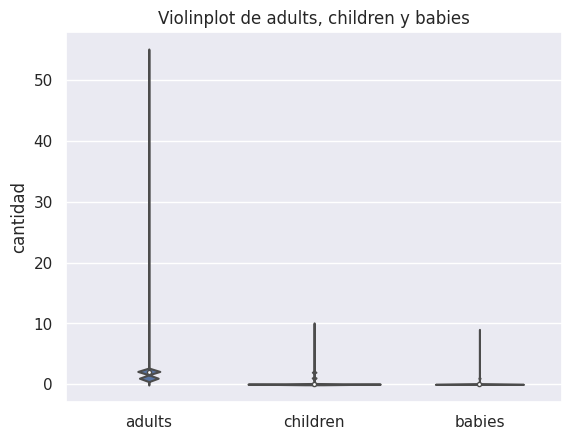

In [83]:
sns.violinplot(data=df.loc[:, ['adults', 'children', 'babies']]).set(title=f"Violinplot de adults, children y babies", ylabel="cantidad")

Acá podemos ver que una observación en la que la cantidad de adultos es mayor a 50 nos está deformando el gráfico, por lo que limitaremos el eje y del gráfico para poder observalo con mayor detalle.

(0.0, 3.0)

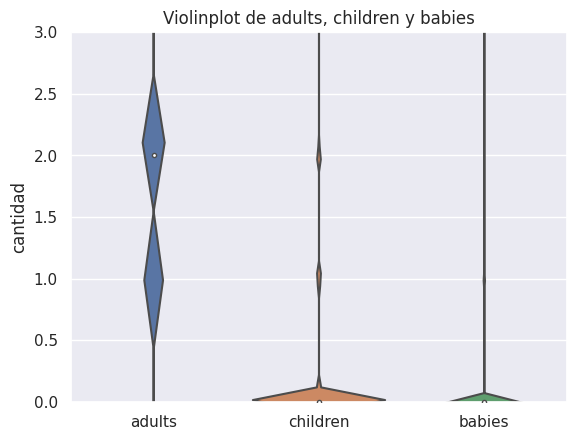

In [84]:
sns.violinplot(data=df.loc[:, ['adults', 'children', 'babies']]).set(title="Violinplot de adults, children y babies", ylabel="cantidad")
plt.ylim(0, 3)

Con este gráfico, podemos observar que, generalmente, las reservas poseen una cantidad de 1 o 2 adultos, 0 niños y 0 bebés (no necesariamente ocurren las 3 en una misma reserva).

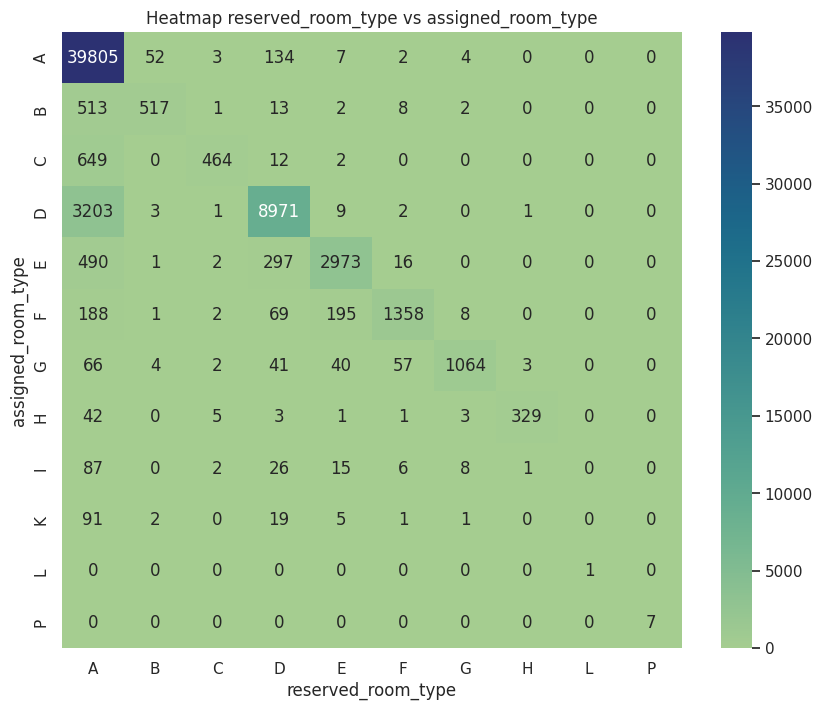

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))
tab = pd.crosstab(df['assigned_room_type'], df['reserved_room_type'])
sns.heatmap(tab, annot=True, fmt='g', cmap="crest", ax=ax, square=False).set(title="Heatmap reserved_room_type vs assigned_room_type")
plt.show()

En general, podemos ver que se respeta el tipo de habitación reservada. Sin embargo, existen casos en los que la habitación asignada difiere de la reservada, como por ejemplo los 3203 casos en los que se asignó la habitación de tipo D cuando se había reservado la de tipo A.

In [86]:
df_same_room = df[df['assigned_room_type'] == df['reserved_room_type']]

df_same_room_is_canceled = df_same_room[df_same_room['is_canceled'] == 'Yes']
df_same_room_is_not_canceled = df_same_room[df_same_room['is_canceled'] == 'No']

df_different_room = df[df['assigned_room_type'] != df['reserved_room_type']]

df_different_room_is_canceled = df_different_room[df_different_room['is_canceled'] == 'Yes']
df_different_room_is_not_canceled = df_different_room[df_different_room['is_canceled'] == 'No']

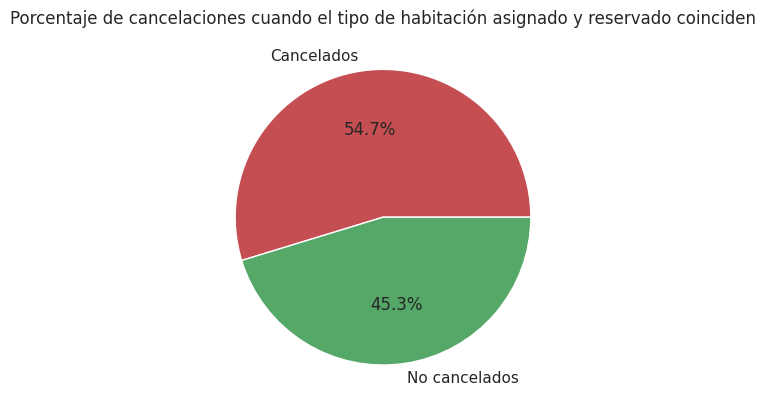

In [87]:
porcentajes_same_room = [df_same_room_is_canceled.shape[0]/len(df_same_room)*100, df_same_room_is_not_canceled.shape[0]/len(df_same_room)*100]
plt.title('Porcentaje de cancelaciones cuando el tipo de habitación asignado y reservado coinciden')
plt.pie(porcentajes_same_room, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

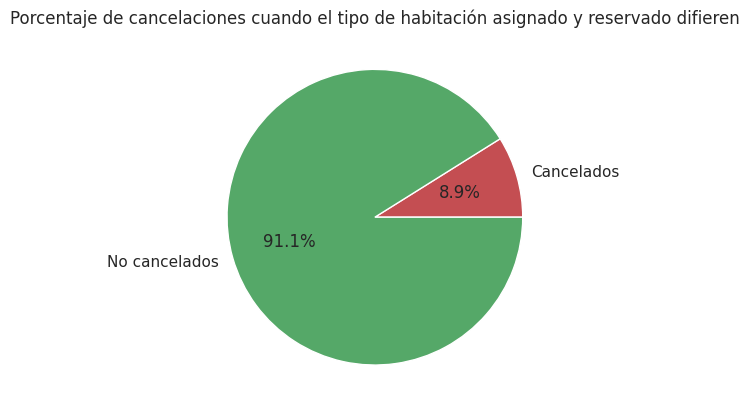

In [88]:
porcentajes_different_room = [df_different_room_is_canceled.shape[0]/len(df_different_room)*100, df_different_room_is_not_canceled.shape[0]/len(df_different_room)*100]
plt.title('Porcentaje de cancelaciones cuando el tipo de habitación asignado y reservado difieren')
plt.pie(porcentajes_different_room, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

Al principio, por sentido común, pensamos que habría un mayor porcentaje de cancelaciones cuando a un cliente se le asignase una habitación distinta a la que reservó. No obstante, analizando los resultados obtenidos podemos ver que sucede lo contrario. Entonces, podemos concluir que si la habitación asignada difiere de la reservada, lo más probable es que la reserva no sea cancelada.

Cabe destacar que hay muchos más casos en los que las habitaciones son iguales. Podría pasar que, si hubiera más casos de habitaciones distintas, la proporción de canceladas y no canceladas podría ser más equilibrada.

En los siguientes gráficos se visualizará el porcentaje de cancelaciones focalizándose en valores que mostraron una tendencia destacable hacia una de las dos opciones.
Por ejemplo, las reservas de Portugal mostraron una cantidad de cancelaciones que aproximadamente duplicaba a las reservas no canceladas, si a su vez contamos las que no tuvieron requerimientos especiales, que también tenían más cancelaciones, tenemos un 35% del total de reservas.

In [89]:
df[(df['country']=='PRT') & (df['total_of_special_requests']==0)].shape[0]

21477

Lógicamente, la probabilidad de que una reserva con estas caracteristicas sea cancelada es más alta.

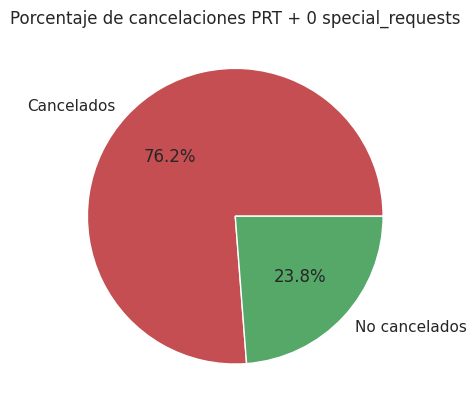

In [90]:
df_prt_0sr = df[(df['country']=='PRT') & (df['total_of_special_requests']==0)]

df_prt_0sr_is_canceled = df_prt_0sr[df_prt_0sr['is_canceled'] == 'Yes']
df_prt_0sr_is_not_canceled = df_prt_0sr[df_prt_0sr['is_canceled'] == 'No']

porcentajes_df_prt_0sr = [df_prt_0sr_is_canceled.shape[0]/len(df_prt_0sr)*100, df_prt_0sr_is_not_canceled.shape[0]/len(df_prt_0sr)*100]

plt.title('Porcentaje de cancelaciones PRT + 0 special_requests')
plt.pie(porcentajes_df_prt_0sr, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

Ocurre lo mismo en el caso contrario, las reservas no portuguesas y que no tuvieron depósito, un 54% del total, mostraron mayor probabilidad de no cancelar.

In [91]:
df[(df['country']!='PRT') & (df['deposit_type']=='No Deposit')].shape[0]

33632

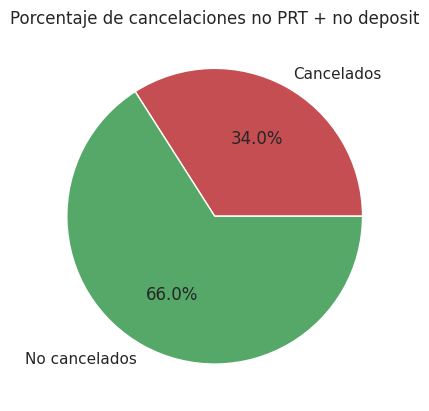

In [92]:
df_noprt_nodeposit = df[(df['country']!='PRT') & (df['deposit_type']=='No Deposit')]

df_noprt_nodeposit_is_canceled = df_noprt_nodeposit[df_noprt_nodeposit['is_canceled'] == 'Yes']
df_noprt_nodeposit_is_not_canceled = df_noprt_nodeposit[df_noprt_nodeposit['is_canceled'] == 'No']

porcentajes_df_noprt_nodeposit = [df_noprt_nodeposit_is_canceled.shape[0]/len(df_noprt_nodeposit)*100, df_noprt_nodeposit_is_not_canceled.shape[0]/len(df_noprt_nodeposit)*100]

plt.title('Porcentaje de cancelaciones no PRT + no deposit')
plt.pie(porcentajes_df_noprt_nodeposit, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

Si continuamos filtrando por valores con tendencias la probabilidad hacia una u otra seguirá aumentando, pero la representación del total de los datos será menor.

In [93]:
df[(df['country']=='PRT') & (df['total_of_special_requests']==0) & (df['assigned_room_type']=='A') & (df['stays_in_week_nights']==2)].shape[0]

7015

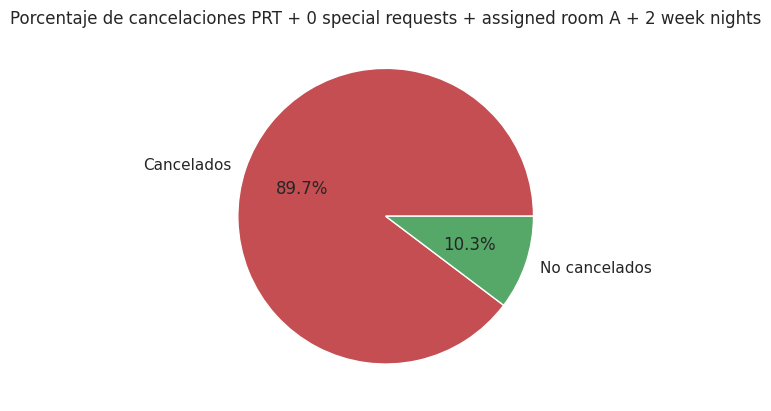

In [94]:
df_prt_0sr_arA_2wn = df[(df['country']=='PRT') & (df['total_of_special_requests']==0) & (df['assigned_room_type']=='A') & (df['stays_in_week_nights']==2)]

df_prt_0sr_arA_2wn_is_canceled = df_prt_0sr_arA_2wn[df_prt_0sr_arA_2wn['is_canceled'] == 'Yes']
df_prt_0sr_arA_2wn_is_not_canceled = df_prt_0sr_arA_2wn[df_prt_0sr_arA_2wn['is_canceled'] == 'No']

porcentajes_df_prt_0sr_arA_2wn = [df_prt_0sr_arA_2wn_is_canceled.shape[0]/len(df_prt_0sr_arA_2wn)*100, df_prt_0sr_arA_2wn_is_not_canceled.shape[0]/len(df_prt_0sr_arA_2wn)*100]

plt.title('Porcentaje de cancelaciones PRT + 0 special requests + assigned room A + 2 week nights')
plt.pie(porcentajes_df_prt_0sr_arA_2wn, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

In [95]:
df[(df['country']!='PRT') & (df['deposit_type']=='No Deposit') & (df['market_segment']=='Direct')].shape[0]

3006

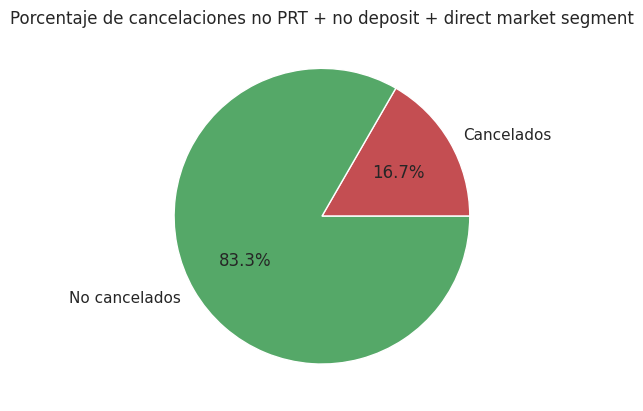

In [96]:
df_noprt_nodeposit_dms = df[(df['country']!='PRT') & (df['deposit_type']=='No Deposit') & (df['market_segment']=='Direct')]

df_noprt_nodeposit_dms_is_canceled = df_noprt_nodeposit_dms[df_noprt_nodeposit_dms['is_canceled'] == 'Yes']
df_noprt_nodeposit_dms_is_not_canceled = df_noprt_nodeposit_dms[df_noprt_nodeposit_dms['is_canceled'] == 'No']

porcentajes_df_noprt_nodeposit_dms = [df_noprt_nodeposit_dms_is_canceled.shape[0]/len(df_noprt_nodeposit_dms)*100, df_noprt_nodeposit_dms_is_not_canceled.shape[0]/len(df_noprt_nodeposit_dms)*100]

plt.title('Porcentaje de cancelaciones no PRT + no deposit + direct market segment')
plt.pie(porcentajes_df_noprt_nodeposit_dms, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

### **Visualizaciones para el reporte**

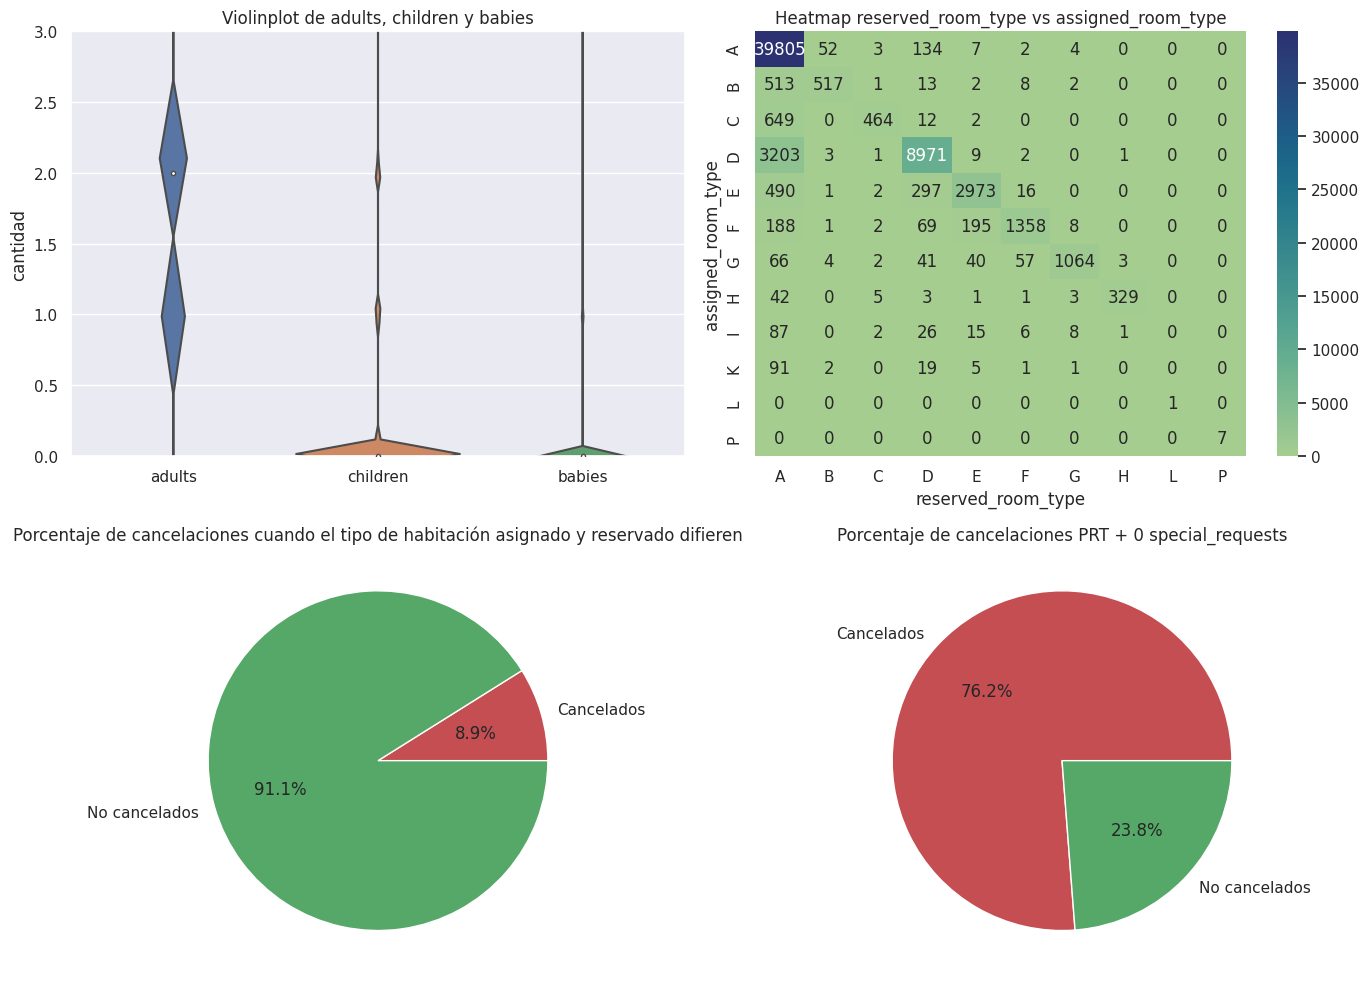

In [97]:
# Creamos una figura con 2 filas y 2 columnas de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Subplot 1:
sns.violinplot(data=df.loc[:, ['adults', 'children', 'babies']], ax=axs[0, 0]).set(title="Violinplot de adults, children y babies", ylabel="cantidad")
axs[0, 0].set_ylim(0, 3)

# Subplot 2:
tab = pd.crosstab(df['assigned_room_type'], df['reserved_room_type'])
sns.heatmap(tab, annot=True, fmt='g', cmap="crest", ax=axs[0, 1], square=False).set(title="Heatmap reserved_room_type vs assigned_room_type")

# Subplot 3:
axs[1, 0].set_title('Porcentaje de cancelaciones cuando el tipo de habitación asignado y reservado difieren')
axs[1, 0].pie(porcentajes_different_room, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')

# Subplot 4:
axs[1, 1].set_title('Porcentaje de cancelaciones PRT + 0 special_requests')
axs[1, 1].pie(porcentajes_df_prt_0sr, labels=['Cancelados', 'No cancelados'], colors=['r','g'], autopct='%1.1f%%')

# Ajustamos la disposición de los subplots
plt.tight_layout()

plt.show()

## **c) Datos Faltantes**

Analizaremos primero los datos faltantes de cada columna representados con NaN.

In [98]:
serie_porcentaje_nulos = df.isnull().sum()/len(df)
serie_porcentaje_nulos = serie_porcentaje_nulos[serie_porcentaje_nulos > 0]
serie_porcentaje_nulos

children    0.000065
country     0.003570
agent       0.127437
company     0.949090
dtype: float64

Se observa que **company** posee un porcentaje demasiado alto de datos faltantes y **agent** una cantidad considerable, mientras que **country** y **children** poseen un porcentaje muy ínfimo de nulos respecto al total. A continuación se vera un representación gráfica de estos porcentajes, excepto para **children**, cuya cantidad de nulos es demasiado escasa como para ser visualizada:

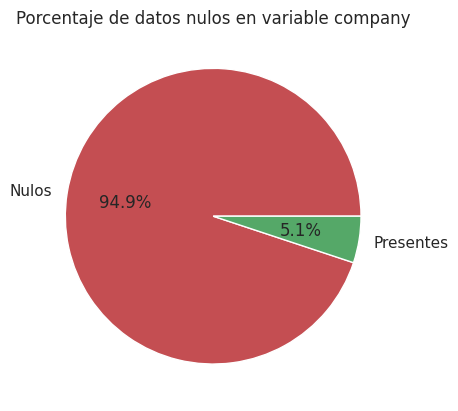

In [99]:
data = [serie_porcentaje_nulos['company'], 1 - serie_porcentaje_nulos['company']]
plt.title('Porcentaje de datos nulos en variable company')
plt.pie(data, labels=['Nulos', 'Presentes'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

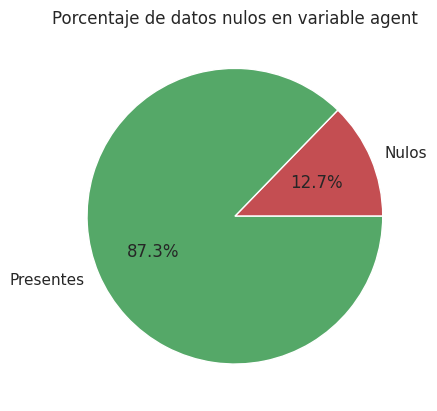

In [100]:
data = [serie_porcentaje_nulos['agent'], 1 - serie_porcentaje_nulos['agent']]
plt.title('Porcentaje de datos nulos en variable agent')
plt.pie(data, labels=['Nulos', 'Presentes'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

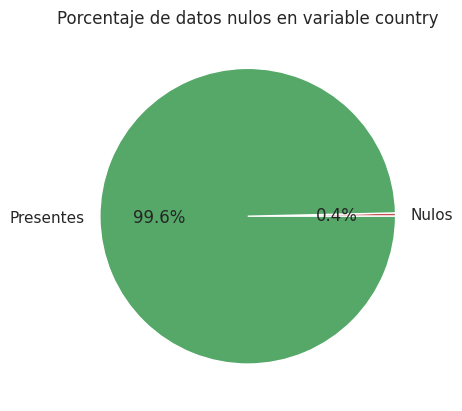

In [101]:
data = [serie_porcentaje_nulos['country'], 1 - serie_porcentaje_nulos['country']]
plt.title('Porcentaje de datos nulos en variable country')
plt.pie(data, labels=['Nulos', 'Presentes'], colors=['r','g'], autopct='%1.1f%%')
plt.show()

En cuanto a como se tratarán estas ausencias, el camino elegido es tomarlas como un dato más y reemplazar los valores NaN con un valor acorde al contexto de cada variable.

Comenzando por la variable **children**, esta solo posee 4 datos nulos de 61913 datos totales, un número excesivamente ínfimo, y sumado a que más del 90% de los valores de esa variable son igual a 0, se decidió remplazar los NaN por la mediana, que precisamente es 0.

Respecto a la variable **country**, que también posee un número bajo de nulos, se interpreta que es una posibilidad coherente que este dato no haya sido informado, quedando asi indefinido, por lo que se reemplazarán los nulos con *Undefined*, valor con el que cuentan otras variables cualitativas del dataset.

Por último, en cuanto a las variables **agent** y **company**, a pesar de poseer una cifra más alta de datos faltantes esto no significa que la ausencia de estos corresponda a un error o una imposibilidad, pudiendo no existir el requerimiento de una agencia o compañia al momento de realizar una reserva, por lo que primero se cambiaran los NaN por un 0, id no válido ni presente, para poder pasar los valores del tipo float a int.

In [102]:
df.fillna(value={'children': df['children'].median(), 'country': 'Undefined', 'company': 0, 'agent': 0}, inplace=True)
serie_porcentaje_nulos = df.isnull().sum()/len(df)
serie_porcentaje_nulos

hotel                             0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

Finalmente pasamos las variables **children**, **agent** y **company** del tipo float al tipo int, dado que no toman ningún valor que no sea entero. Luego, reemplazamos los 0 de **agent** y **company** por 'Undefined' para tratarlo como un valor categórico más.

In [103]:
cols_float_to_int = ['children', 'agent', 'company']
df[cols_float_to_int] = df[cols_float_to_int].astype(int)

cols_to_str = ['agent', 'company']
df[cols_to_str] = df[cols_to_str].replace({0: 'Undefined'})
df[cols_to_str] = df[cols_to_str].astype(str)

df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

Los siguientes gráficos muestran como quedaron las distribuciones de los valores con la redefinición de los nulos, se omite el gráfico de **children** dado que no puede apreciarse visualmente un cambio significativo.

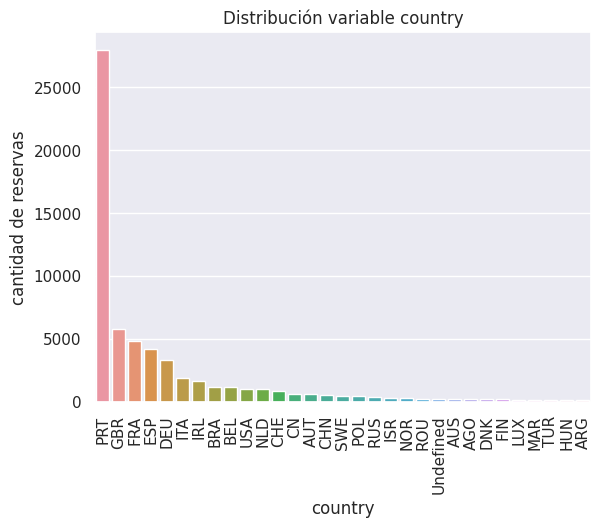

In [104]:
df_count = df['country'].value_counts().reset_index(name='cantidad de reservas')
df_count = df_count[df_count['cantidad de reservas'] > 100].reset_index()
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable country", xlabel='country')
plt.xticks(rotation=90)
plt.show()

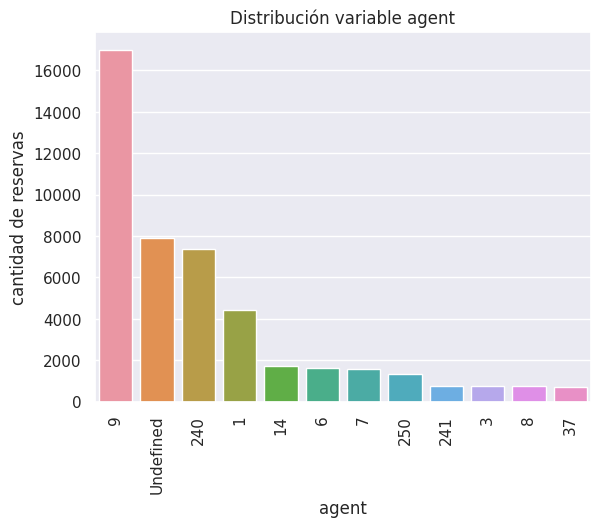

In [105]:
df_count = df['agent'].value_counts().reset_index(name='cantidad de reservas')
df_count = df_count[df_count['cantidad de reservas'] > 700].reset_index()
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable agent", xlabel='agent')
plt.xticks(rotation=90)
plt.show()

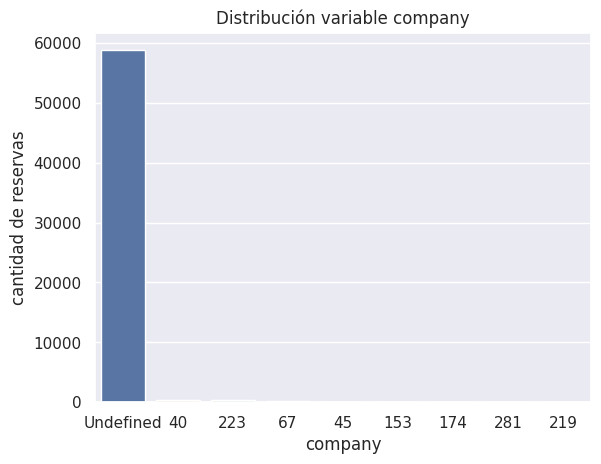

In [106]:
df_count = df['company'].value_counts().reset_index(name='cantidad de reservas')
df_count = df_count[df_count['cantidad de reservas'] > 60].reset_index()
bar=sns.barplot(data=df_count, x='index', y='cantidad de reservas').set(title="Distribución variable company", xlabel='company')

En cuanto a datos faltantes representados por caracteres erróneos, especiales o vacíos, la exploración inicial no arrojó la presencia de ninguna de estas posibles situaciones. Tampoco existen filas repetidas, aunque esto se debe principalmente a la variable **id**, que otorga unicidad a cada una.

In [107]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

[0 rows x 31 columns]

Respecto a valores que no tienen sentido dada la variable que representan, se encontraron filas en las cuales tanto la variable **adults** como **children** y **babies** poseen valor 0, un hecho incoherente ya que al menos una persona deberia figurar como huesped de la respectiva reserva.

In [108]:
df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].shape

(76, 31)

Como solo 76 filas cuentan con esta característica, el método a seguir es el siguiente: dado que **children** y **babies** poseen sus cuartiles iguales a 0 y más del 90% de los valores de estas columnas toman este valor, se mantendrá este número como estaba en dichas variables. En cuanto a **adults**, los cuartiles son iguales a 2 y el 75% de la columna tiene dicho valor, si completamos estas 76 filas con la mediana, este porcentaje de representación apenas se verá afectado, al igual que la distribución de la variable.

In [109]:
df.loc[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0), 'adults'] = df['adults'].median()

In [110]:
df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].shape

(0, 31)

Se omitirá la visualización gráfica tras la imputación debido a que no se aprecia ninguna diferencia.

## **d) Valores atípicos**

En esta sección, analizaremos la existencia de valores atípicos. Los detectaremos tanto de forma univariada como multivariada y realizaremos gráficos que permitan su visualización.

### **Detección Univariada**

Utilizaremos el método de IQR para identificar valores atípicos moderados (+/- 1.5 * IQR) y severos (+/- 3 * IQR) de variables numéricas, y gráficaremos las variables analizadas con tal de ver cómo se distribuyen las observaciones variables según que tipo de outlier son, o si no lo son.

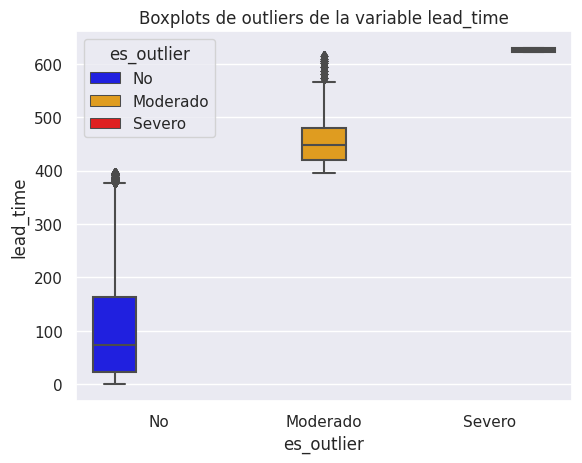

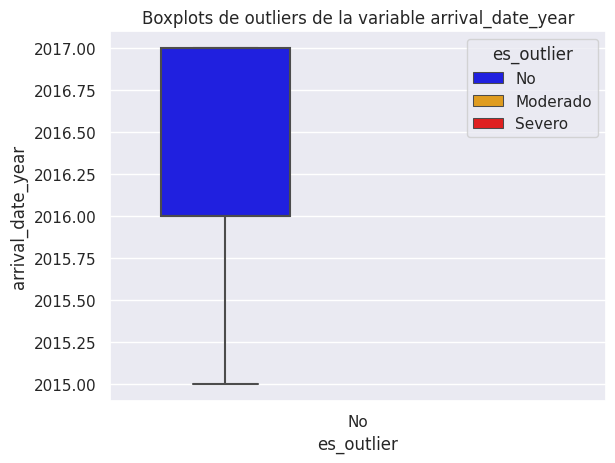

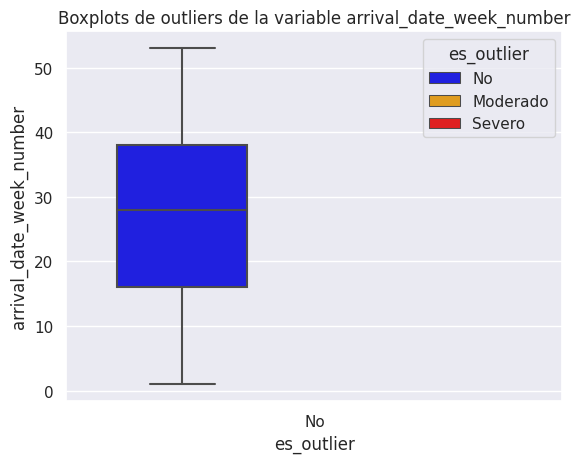

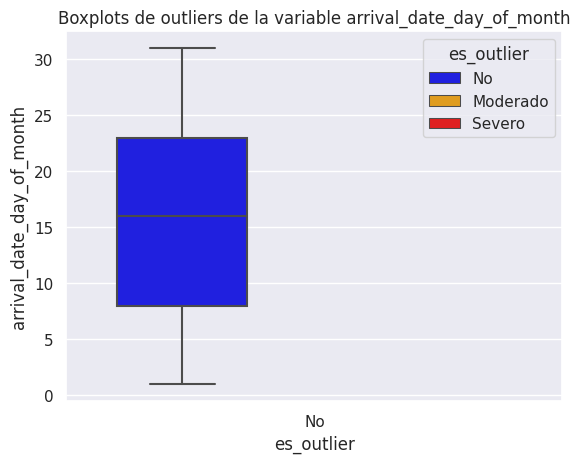

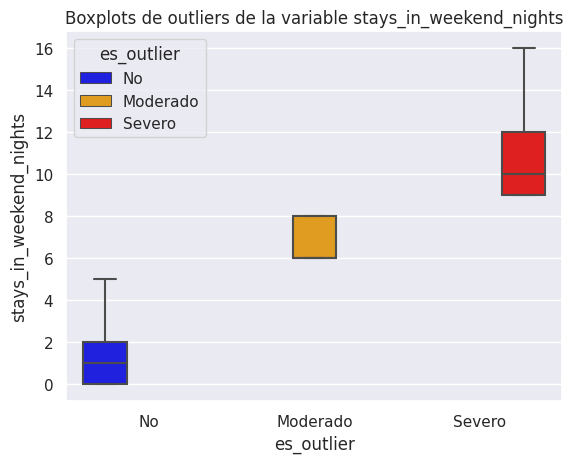

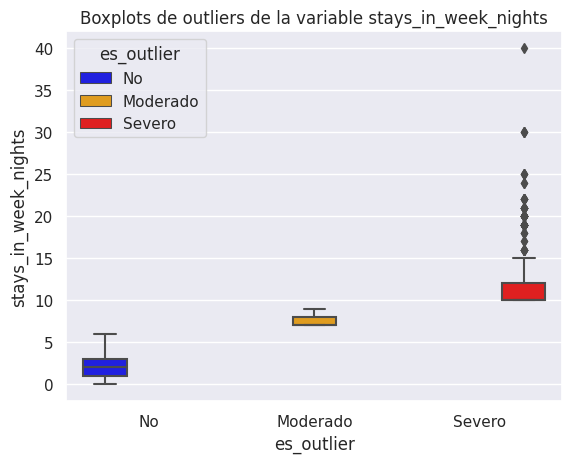

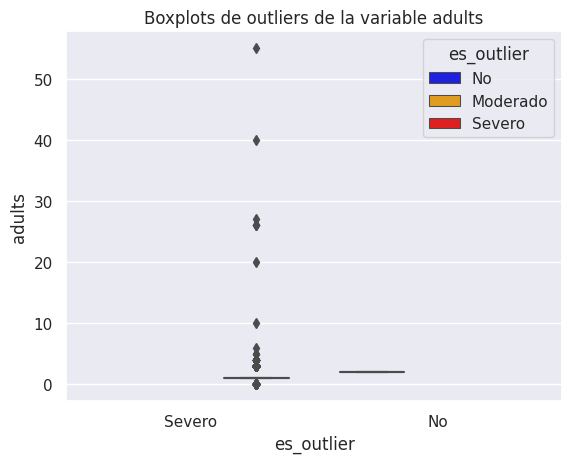

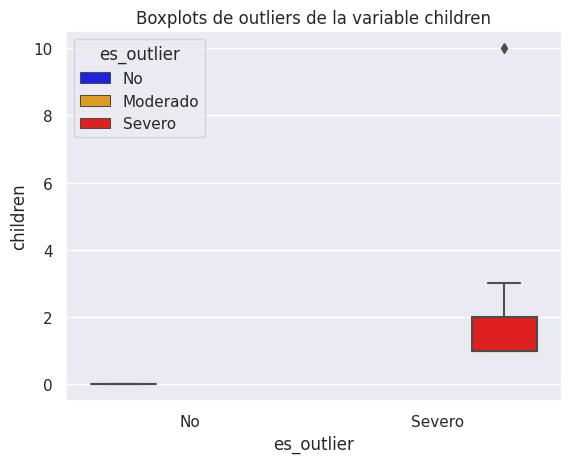

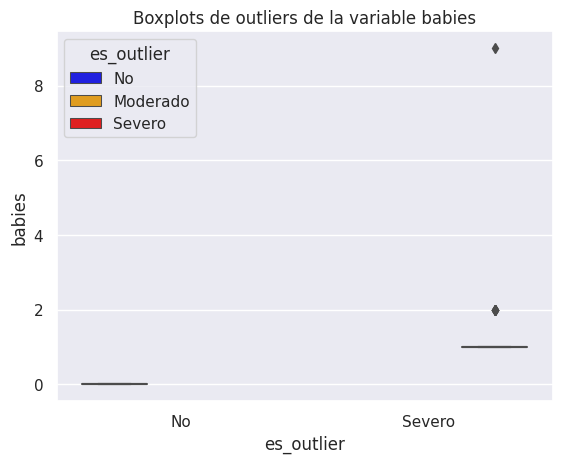

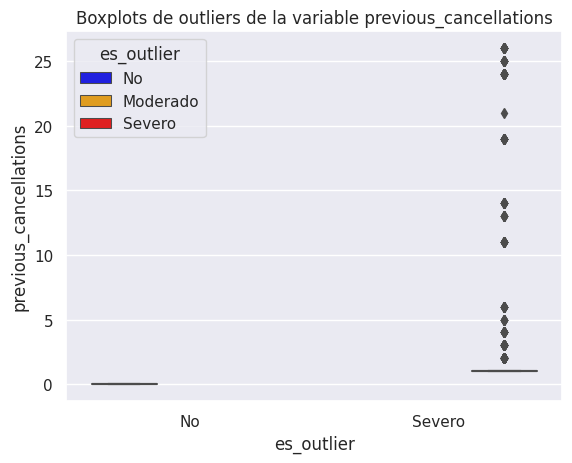

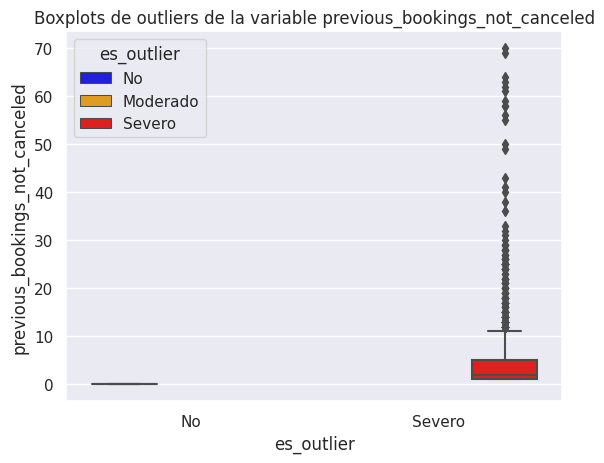

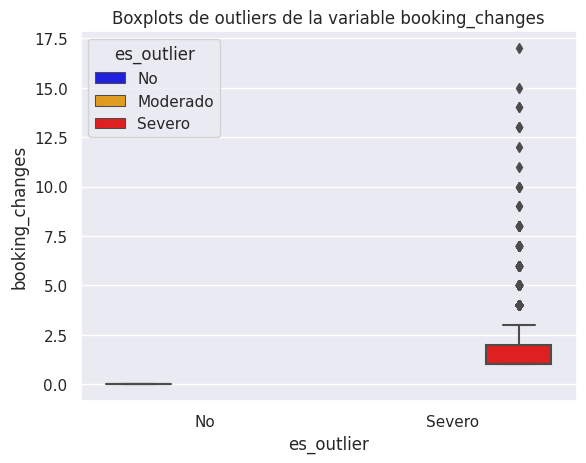

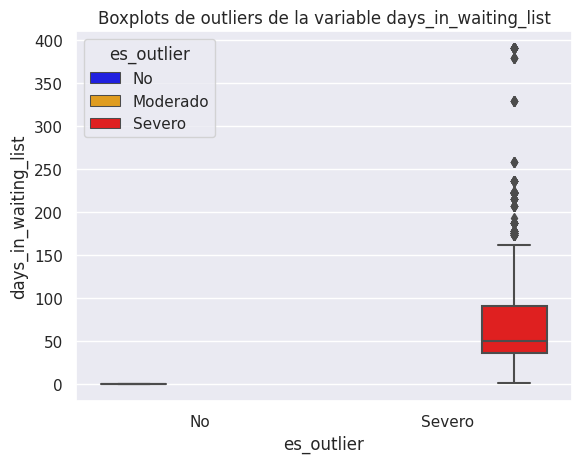

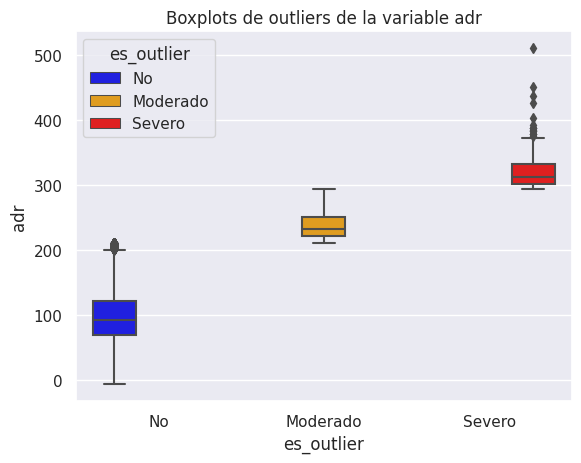

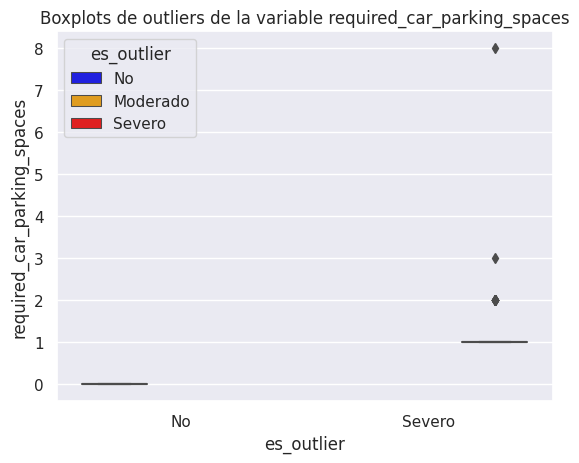

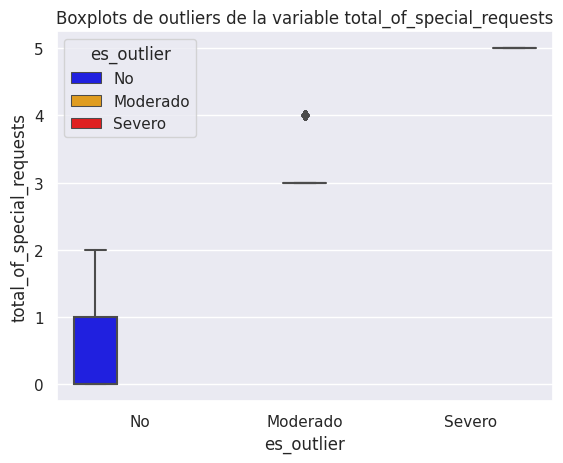

In [111]:
df_numeric = df.select_dtypes(include='number')

# Calculamos el rango intercuartílico (IQR) para cada columna
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificamos los valores atípicos en cada columna
df_outliers_moderados = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))
df_outliers_severos = ((df_numeric < (Q1 - 3 * IQR)) | (df_numeric > (Q3 + 3 * IQR)))

def es_outlier(row):
    if row['es_outlier_moderado'] and not row['es_outlier_severo']: return "Moderado"
    elif row['es_outlier_severo']: return "Severo"
    else: return "No"

def grafico_outliers_univariado(df_numeric, df_outliers_moderados, df_outliers_severos, var):
  df_adr_outliers = pd.DataFrame()
  df_adr_outliers[var] = df_numeric[var]
  df_adr_outliers['es_outlier_moderado'] = df_outliers_moderados[var]
  df_adr_outliers['es_outlier_severo'] = df_outliers_severos[var]
  df_adr_outliers['es_outlier'] = df_adr_outliers.apply(es_outlier, axis=1)
  sns.boxplot(data=df_adr_outliers, x='es_outlier', y=var, hue='es_outlier', hue_order=['No', 'Moderado', 'Severo'], palette=["blue", "orange", "red"]).set(title=f"Boxplots de outliers de la variable {var}")
  plt.show()

for var in df_outliers_moderados.columns:
  grafico_outliers_univariado(df, df_outliers_moderados, df_outliers_severos, var)

En los gráficos realizados, podemos ver 3 boxplots en cada uno de ellos, uno para las observaciones que no son consideradas outliers, otro para los outliers moderados, y uno último para outliers severos. También, podemos interpretar que los outliers de los boxplots son casi de la próxima o anterior categoría (dependiendo si están por encima o por debajo de los bigotes del boxplot). Por ejemplo, en el gráfico de "lead_time", las observaciones que se encuentran por encima del bigote superior del boxplot correspondiente a los outliers moderados, son outliers moderados casi severos.

### **Detección Multivariada**

Utilizaremos el método de la Distancia de Mahalanobis para identificar valores atípicos moderados de variables numéricas.

In [112]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

df_mahalanobis = df_numeric.copy()

# calculamos la matriz de covarianza de los datos
covariance_matrix = np.cov(df_mahalanobis.T)

# obtenemos la inversa de la matriz de covarianza
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

# calculamos la distancia de Mahalanobis para cada punto en el dataframe
mahalanobis_distance = []
for i in range(len(df)):
    x_minus_mu = df_mahalanobis.iloc[i] - df_mahalanobis.mean()
    mahalanobis_distance.append(np.sqrt(x_minus_mu.dot(inv_covariance_matrix).dot(x_minus_mu.T)))
df_mahalanobis['mahalanobis_distance'] = mahalanobis_distance

Ahora obtenemos el valor del umbral y filtramos los outliers según el mismo. Utilizamos la distribución chi-cuadrado para determinar el umbral ya que la distribución de la Distancia de Mahalanobis se puede expresar en términos de la distribución chi-cuadrado. Fuimos variando el valor del nivel de confianza y observando los gráficos, y decidimos quedarnos con 0.7 debido a que los outliers están alejados de las nubes de puntos.

In [113]:
# obtenemos el valor del umbral
p = 0.7 # nivel de confianza
df_chi2 = len(df_mahalanobis.columns)-1 # grados de libertad
umbral = chi2.ppf(p, df_chi2)

# filtramos los outliers según el umbral determinado
df_outliers_mahalanobis = df_mahalanobis[df_mahalanobis['mahalanobis_distance'] > umbral]

df_outliers_mahalanobis

lead_time  arrival_date_year  arrival_date_week_number  \
152          275               2015                        41   
337          244               2015                        36   
518          443               2016                        41   
802          275               2015                        41   
1369         159               2016                        22   
...          ...                ...                       ...   
59059        333               2015                        36   
59165        338               2015                        41   
59389          0               2015                        33   
59761        244               2015                        36   
60138        222               2015                        38   

       arrival_date_day_of_month  stays_in_weekend_nights  \
152                            4                        2   
337                            3                        0   
518                            7                        0   
802                            4                        2   
1369                          26                        0   
...                          ...                      ...   
59059                          5                        2   
59165                          4                        2   
59389                         11                        2   
59761                          2                        2   
60138                         15                        1   

       stays_in_week_nights  adults  children  babies  previous_cancellations  \
152                       0       2         0       0                      26   
337                       3       2         0       0                      19   
518                       2       2         0       0                       0   
802                       0       2         0       0                      26   
1369                      3       1         0       0                       0   
...                     ...     ...       ...     ...                     ...   
59059                     5      26         0       0                       0   
59165                     0      55         0       0                       0   
59389                    10       2         0       0                       0   
59761                     5       2         0       0                      24   
60138                     5       2         0       0                      25   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
152                                 0                0                     0   
337                                 0                0                     0   
518                                 0                0                   391   
802                                 0                0                     0   
1369                                0               13                     0   
...                               ...              ...                   ...   
59059                               0                0                     0   
59165                               0                0                     0   
59389                               0               11                     0   
59761                               0                0                     0   
60138                               0                0                     0   

          adr  required_car_parking_spaces  total_of_special_requests  \
152     50.00                            0                          0   
337     36.00                            0                          0   
518     65.00                            0                          0   
802     50.00                            0                          0   
1369   119.85                            0                          1   
...       ...                          ...                        ...   
59059    0.00                            0      

[Text(0.5, 1.0, 'Boxplot de mahalanobis_distance')]

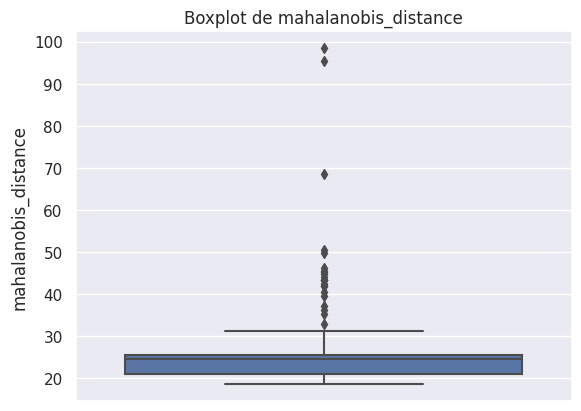

In [114]:
sns.boxplot(data=df_outliers_mahalanobis, y='mahalanobis_distance').set(title=f"Boxplot de mahalanobis_distance")

Ahora, realizaremos algunos dispersogramas para ver la distribución de los outliers al enfrentar dos variables.

In [115]:
def scatterplot_outliers(df, var_x, var_y, serie_indices_outliers):
  sns.scatterplot(data=df, x=var_x , y=var_y, hue=serie_indices_outliers).set(title=f"Scatterplot {var_x} vs {var_y}")
  plt.legend(title="Outlier")
  plt.show()

In [116]:
es_outlier_mahalanobis = (df_mahalanobis['mahalanobis_distance'] > umbral)

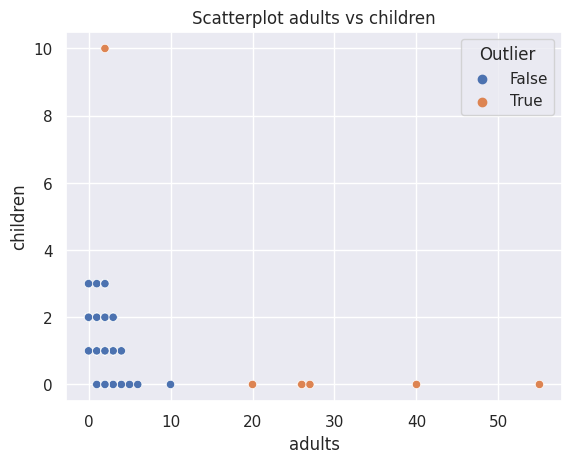

In [117]:
scatterplot_outliers(df, 'adults', 'children', es_outlier_mahalanobis)

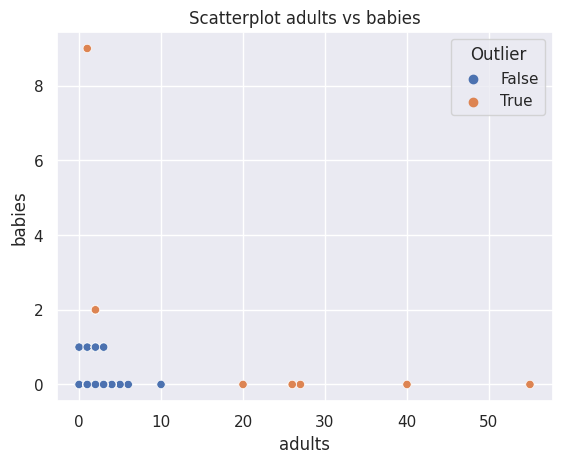

In [118]:
scatterplot_outliers(df, 'adults', 'babies', es_outlier_mahalanobis)

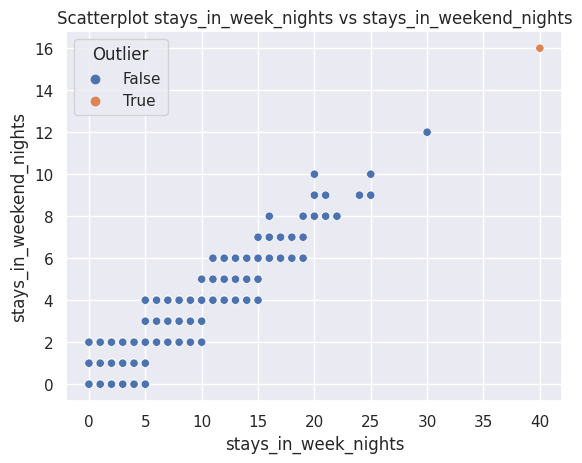

In [119]:
scatterplot_outliers(df, 'stays_in_week_nights', 'stays_in_weekend_nights', es_outlier_mahalanobis)

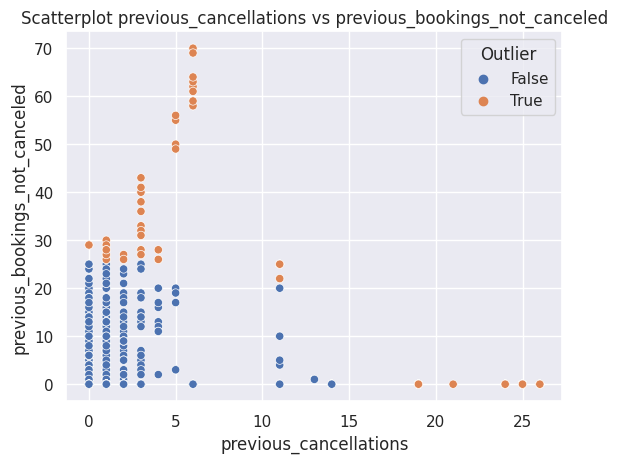

In [120]:
scatterplot_outliers(df, 'previous_cancellations', 'previous_bookings_not_canceled', es_outlier_mahalanobis)

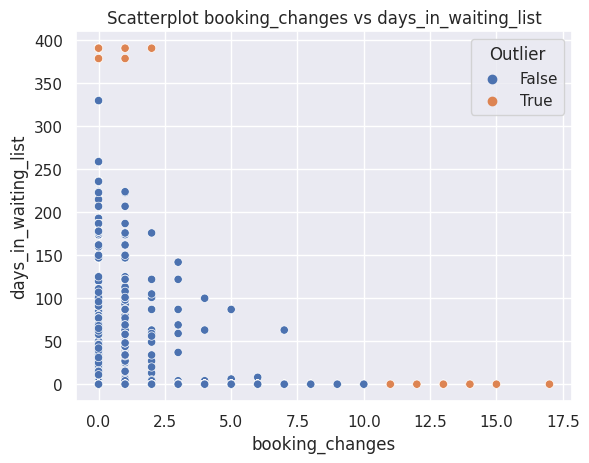

In [121]:
scatterplot_outliers(df, 'booking_changes', 'days_in_waiting_list', es_outlier_mahalanobis)

También, existen otros métodos para detectar outliers de forma multivariada, como lo es Isolation Forest:

In [122]:
from sklearn.ensemble import IsolationForest

df_isolation_forest = df_numeric.copy()

# Instanciamos el modelo IsolationForest
model = IsolationForest(n_estimators=5000)

# Entrenamos el modelo
model.fit(df_isolation_forest)

# Predecimos las etiquetas de outliers (-1) y no outliers (1)
labels = model.predict(df_isolation_forest)

# Identificamos los outliers
df_outliers_isolation_forest = df_isolation_forest[labels == -1]

df_outliers_isolation_forest

lead_time  arrival_date_year  arrival_date_week_number  \
2             25               2016                        42   
6            112               2015                        46   
11           349               2016                        41   
71             4               2016                        27   
83           364               2016                        42   
...          ...                ...                       ...   
61845          4               2016                        53   
61865        153               2015                        38   
61886        148               2017                        29   
61889          4               2017                         6   
61903        140               2017                        26   

       arrival_date_day_of_month  stays_in_weekend_nights  \
2                             13                        0   
6                             12                        4   
11                             4                        1   
71                             1                        0   
83                            12                        0   
...                          ...                      ...   
61845                         31                        0   
61865                         17                        4   
61886                         19                        0   
61889                         10                        0   
61903                         28                        0   

       stays_in_week_nights  adults  children  babies  previous_cancellations  \
2                         1       2         2       0                       0   
6                         9       2         0       0                       0   
11                        5       1         0       0                       0   
71                        2       2         2       0                       0   
83                        4       3         0       0                       0   
...                     ...     ...       ...     ...                     ...   
61845                     1       2         2       0                       0   
61865                    10       2         0       0                       0   
61886                     3       2         1       0                       0   
61889                     2       3         2       0                       0   
61903                     3       2         3       0                       0   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
2                                   0                0                     0   
6                                   0                1                     0   
11                                  0                0                   162   
71                                  0                0                     0   
83                                  0                3                     0   
...                               ...              ...                   ...   
61845                               0                0                     0   
61865                               0                1                     0   
61886                               0                2                     0   
61889                               0                0                     0   
61903                               0                1                     0   

          adr  required_car_parking_spaces  total_of_special_requests  
2      229.00                            0                          2  
6       66.42                            0                          1  
11      80.00                            0                          0  
71     201.00                            1                          0  
83     101.00                            0                          0  
...       ...                          ...                        ...  
61845  169.00                            0             

Podemos ver que los distintos métodos difieren en los outliers detectados. Esto se debe a que cada uno procede de distinta forma para alcanzar el mismo objetivo. Además, cada uno es configurado con distintos hiperparámetros.

En este caso, podemos ver que el método de Isolation Forest nos da una cantidad mucho mayor de outliers que la Distancia de Mahalanobis. Si establecieramos un umbral menos exigente para la detección de outliers mediante la Distancia de Mahalanobis, obtendríamos muchos más outliers. De todas formas, la mayoría de los obtenidos con dicho método deberían estar incluidos en los obtenidos con Isolation Forest. Veremos esto a continuación.

In [123]:
outliers_en_comun = df_outliers_mahalanobis.index.isin(df_outliers_isolation_forest.index)
print(f"Porcentaje de outliers de Mahalanobis incluidos en outliers de Isolation Forest: {outliers_en_comun.tolist().count(True)/len(outliers_en_comun)*100}%")

Porcentaje de outliers de Mahalanobis incluidos en outliers de Isolation Forest: 69.1919191919192%


Ahora, realizaremos los mismos gráficos que antes para observar los outliers obtenido con Isolation Forest

In [124]:
df_es_outlier_isolation_forest = df_isolation_forest.isin(df_outliers_isolation_forest)
es_outlier_isolation_forest = df_es_outlier_isolation_forest.apply(lambda x: all(x), axis=1)

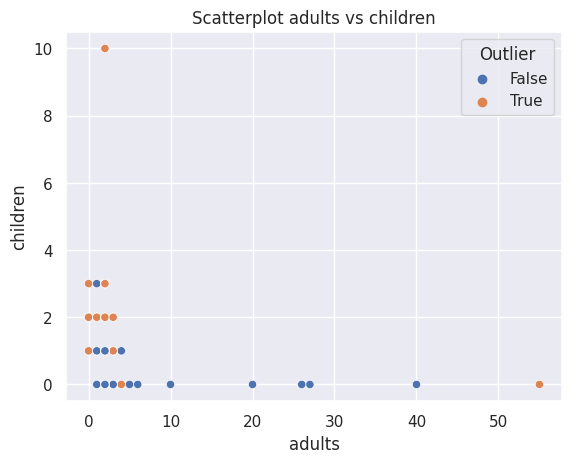

In [125]:
scatterplot_outliers(df, 'adults', 'children', es_outlier_isolation_forest)

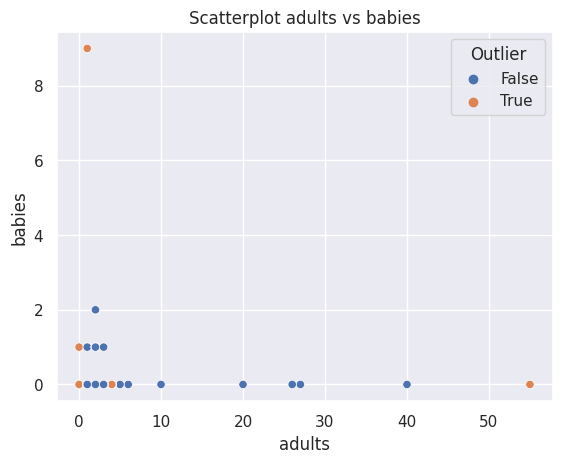

In [126]:
scatterplot_outliers(df, 'adults', 'babies', es_outlier_isolation_forest)

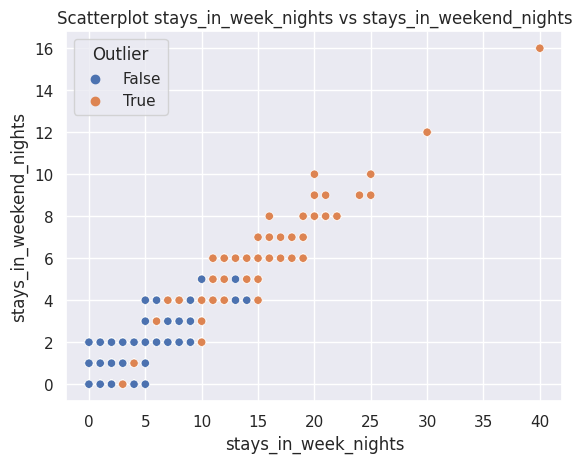

In [127]:
scatterplot_outliers(df, 'stays_in_week_nights', 'stays_in_weekend_nights', es_outlier_isolation_forest)

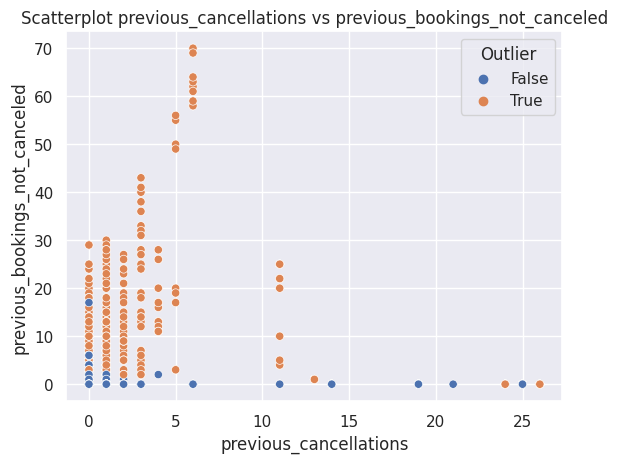

In [128]:
scatterplot_outliers(df, 'previous_cancellations', 'previous_bookings_not_canceled', es_outlier_isolation_forest)

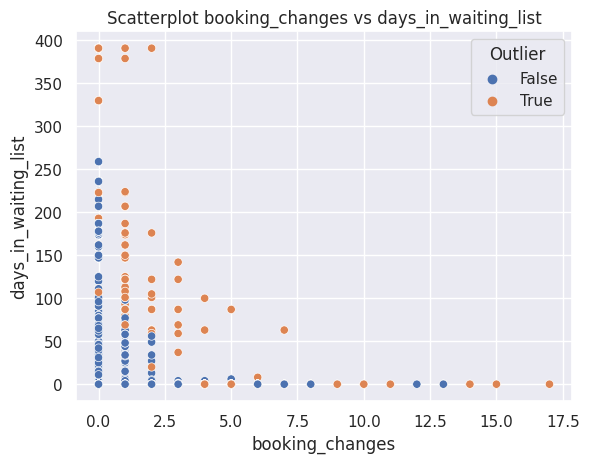

In [129]:
scatterplot_outliers(df, 'booking_changes', 'days_in_waiting_list', es_outlier_isolation_forest)

Viendo los gráficos, en principio, creemos que los outliers identificados por la Distancia de Mahalanobis son más apropiados ya que son los que están más alejados de las nubes de puntos.